# 1 Business Understanding

### 1.1 Background
Malaria and typhoid are two of the most common diseases in Ghana, especially in rural and low-income areas. Both cause fever, headache, and body weakness, and they affect many people every year. Because the symptoms are so similar, health workers often find it hard to know which disease a patient has without lab tests. However, many clinics and health centers in rural areas do not have the tools, supplies, or trained staff to run these tests.

As a result, patients are usually treated based on symptoms alone. This leads to wrong treatments, like giving malaria medicine to someone who actually has typhoid, or giving antibiotics to someone with malaria. Wrong treatment can make patients sicker, increase healthcare costs, and lead to drug resistance, which makes future treatments less effective.

### 1.2 Problem Statement
The main problem is that malaria and typhoid are hard to tell apart based on symptoms, and many health facilities lack access to reliable lab tests. This results in misdiagnosis, incorrect treatment, and growing drug resistance. The situation is worse in rural areas where healthcare resources are limited.

### 1.3 Business Goal
The goal is to improve the accuracy of diagnosing malaria and typhoid in primary healthcare settings, especially in rural areas of Ghana. By doing this, we can ensure patients get the right treatment faster, reduce the misuse of drugs, and lower the risk of drug resistance.

### 1.4 Project Objective
This project aims to develop a simple, smart tool using machine learning that can help health workers tell the difference between malaria and typhoid based only on a patient’s symptoms and basic information (like age, location, and fever duration). The tool will work even in clinics without lab testing and can be used on mobile phones or simple computers.

### 1.5 Success Criteria
The project will be considered successful if:

#### Technical Success
* The tool correctly identifies whether a patient has malaria or typhoid at least 85% of the time.

#### Business Success
* It reduces the number of wrong treatments given.
* It helps health centers make faster and more accurate decisions without needing lab tests.








# 2. Data Understanding 

In [33]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)



In [34]:
#import dataset
df = pd.read_csv('..\dataset\synthetic_malaria_typhoid_dataset.csv')
df.head(20)

,Fever,Fatigue,Weakness,Loss_of_Appetite,Weight_Loss,Sweating,Chills,Headache,Muscle_Pain,Joint_Pain,...,Back_Pain,Dehydration,Swelling_Feet,Condition,Temperature,Heart_Rate,Platelet_Count,Noise,Symptom_Count,Severity_Index
0,0,1,1,0,0,1,0,1,0,1,...,1,1,0,Malaria,38.700062,88.942549,59.489171,0.713331,26,14.300335
1,1,1,1,0,1,1,0,1,1,1,...,1,0,0,Malaria,38.838868,62.597873,90.769641,0.737259,25,14.117643
2,1,0,0,1,1,0,0,1,0,0,...,1,0,0,Typhoid,37.298361,78.457597,219.442320,0.076410,21,13.272067
3,0,0,0,0,0,1,0,0,1,0,...,0,0,1,Typhoid,38.156407,79.601317,231.637991,0.299896,13,12.661358
4,0,1,1,1,1,1,1,1,1,1,...,0,1,0,Malaria,37.678278,78.766706,160.078422,0.720573,22,13.475015
5,1,1,0,0,1,0,0,1,0,1,...,1,0,0,Malaria,38.910786,96.197224,117.922478,0.824498,19,13.618238
6,0,0,0,0,1,0,1,0,1,1,...,0,0,1,Typhoid,38.496386,73.197696,222.986394,0.855459,19,13.368120
7,1,1,1,1,1,1,0,1,1,0,...,1,0,0,Malaria,39.005593,90.469111,151.105491,0.237782,22,13.954676
8,0,0,1,0,1,1,1,1,1,1,...,0,1,1,Typhoid,37.531035,99.531038,201.601559,0.431766,26,13.851401
9,1,0,1,0,0,0,0,1,0,1,...,1,1,0,Malaria,37.537999,77.572629,167.448400,0.043497,19,13.181002


In [35]:
# shape of the dataset
df.shape

(50000, 48)

In [36]:
# data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fever                50000 non-null  int64  
 1   Fatigue              50000 non-null  int64  
 2   Weakness             50000 non-null  int64  
 3   Loss_of_Appetite     50000 non-null  int64  
 4   Weight_Loss          50000 non-null  int64  
 5   Sweating             50000 non-null  int64  
 6   Chills               50000 non-null  int64  
 7   Headache             50000 non-null  int64  
 8   Muscle_Pain          50000 non-null  int64  
 9   Joint_Pain           50000 non-null  int64  
 10  Dizziness            50000 non-null  int64  
 11  Paleness             50000 non-null  int64  
 12  Nausea               50000 non-null  int64  
 13  Vomiting             50000 non-null  int64  
 14  Abdominal_Pain       50000 non-null  int64  
 15  Diarrhea             50000 non-null 

In [37]:
# summary statistics
df.describe()

,Fever,Fatigue,Weakness,Loss_of_Appetite,Weight_Loss,Sweating,Chills,Headache,Muscle_Pain,Joint_Pain,...,Burning_Urine,Back_Pain,Dehydration,Swelling_Feet,Temperature,Heart_Rate,Platelet_Count,Noise,Symptom_Count,Severity_Index
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.489240,0.595880,0.682140,0.523520,0.452640,0.387880,0.396560,0.661360,0.511220,0.686620,...,0.379540,0.522740,0.583200,0.432260,38.597808,92.608607,156.902453,0.498180,21.184880,13.725947
std,0.499889,0.490726,0.465649,0.499451,0.497757,0.487272,0.489188,0.473252,0.499879,0.463872,...,0.485277,0.499488,0.493034,0.495395,0.621943,12.880527,43.351194,0.287879,3.198422,0.389634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,36.051406,35.094926,-12.466788,0.000010,9.000000,12.021781
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,38.181953,84.060235,127.476845,0.249156,19.000000,13.464276
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,38.598613,92.765931,156.490979,0.497002,21.000000,13.722674
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,39.022031,101.316700,185.584377,0.746753,23.000000,13.983592
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,41.186337,150.149940,350.324790,0.999996,36.000000,15.621773


In [38]:
#missing values
df.isnull().sum()


Fever                  0
Fatigue                0
Weakness               0
Loss_of_Appetite       0
Weight_Loss            0
Sweating               0
Chills                 0
Headache               0
Muscle_Pain            0
Joint_Pain             0
Dizziness              0
Paleness               0
Nausea                 0
Vomiting               0
Abdominal_Pain         0
Diarrhea               0
Constipation           0
Bloating               0
Confusion              0
Insomnia               0
Seizures               0
Irritability           0
Cough                  0
Shortness_of_Breath    0
Chest_Pain             0
Sore_Throat            0
Anemia                 0
Jaundice               0
Bleeding_Gums          0
Bruising               0
Rash                   0
Itching                0
Yellow_Eyes            0
Eye_Pain               0
Blurred_Vision         0
Dark_Urine             0
Frequent_Urination     0
Burning_Urine          0
Back_Pain              0
Dehydration            0


In [39]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

# Target Variable Analysis

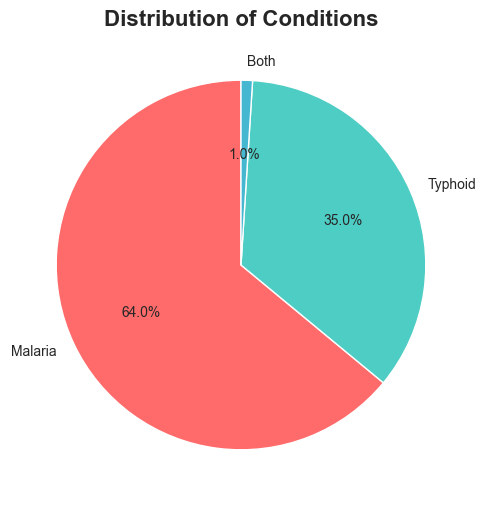

Class distribution:
Condition
Malaria    32000
Typhoid    17500
Both         500
Name: count, dtype: int64

Class balance ratio: 0.016


In [40]:
# Target distribution
plt.figure(figsize=(10, 6))
target_counts = df['Condition'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution of Conditions', fontsize=16, fontweight='bold')
plt.show()

print("Class distribution:")
print(target_counts)
print(f"\nClass balance ratio: {target_counts.min()/target_counts.max():.3f}")

#### Insight

The target variable shows a relatively balanced distribution with:

* Malaria: 40.3%

* Typhoid: 29.1%

* Both: 30.5%


### Temperature Analysis by Condition

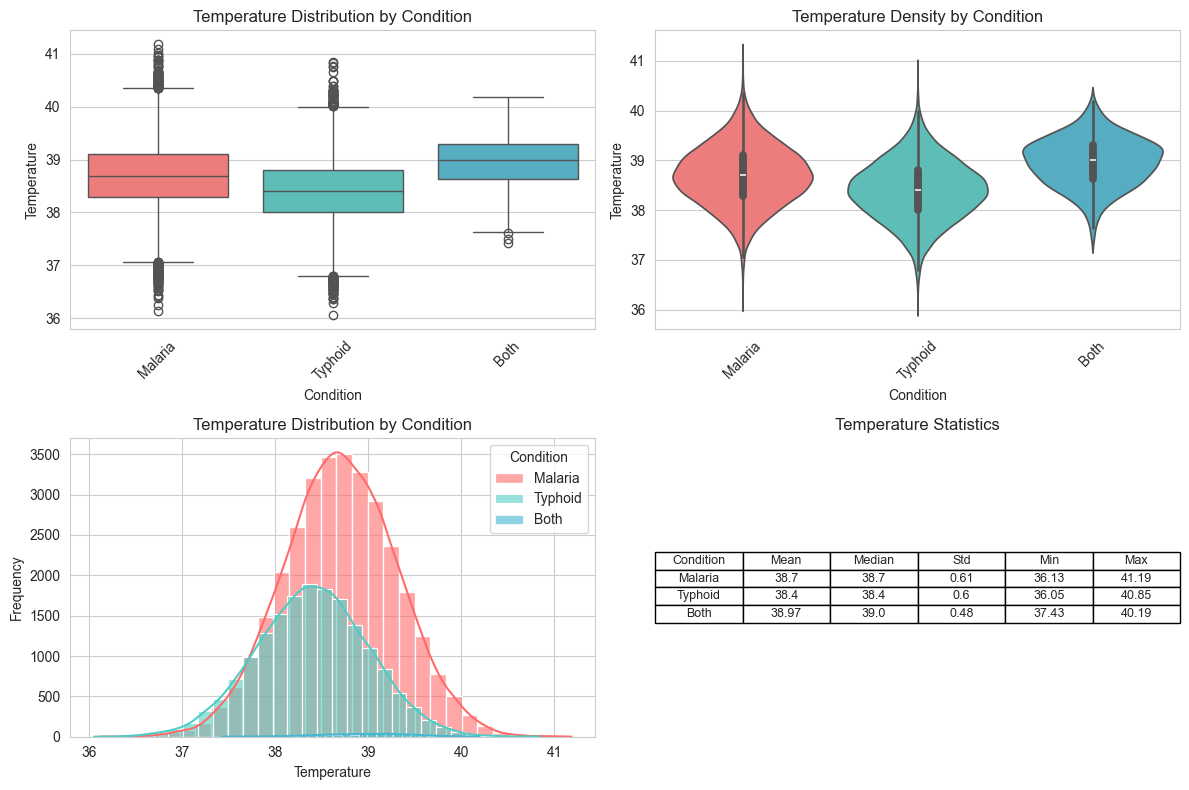


ANOVA Test for Temperature Across Conditions:
F-statistic: 1494.320
p-value: 0.0000e+00


In [41]:
# ============================================
# TEMPERATURE DISTRIBUTION BY CONDITION ANALYSIS
# ============================================

# Set up figure for multiple subplots
plt.figure(figsize=(12, 8))

# --- (1) Box Plot ---
plt.subplot(2, 2, 1)
sns.boxplot(x='Condition', y='Temperature', data=df, palette=colors)
plt.title('Temperature Distribution by Condition', fontsize=12)
plt.xlabel('Condition')
plt.ylabel('Temperature')
plt.xticks(rotation=45)

# --- (2) Violin Plot ---
plt.subplot(2, 2, 2)
sns.violinplot(x='Condition', y='Temperature', data=df, palette=colors)
plt.title('Temperature Density by Condition', fontsize=12)
plt.xlabel('Condition')
plt.ylabel('Temperature')
plt.xticks(rotation=45)

# --- (3) Histogram with KDE Overlay ---
plt.subplot(2, 2, 3)
for condition, color in zip(df['Condition'].unique(), colors):
    subset = df[df['Condition'] == condition]
    sns.histplot(subset['Temperature'], kde=True, 
                 color=color, alpha=0.6, bins=30, label=condition)
plt.title('Temperature Distribution by Condition', fontsize=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(title='Condition')

# --- (4) Statistical Summary Table ---
plt.subplot(2, 2, 4)
stats_data = []

# Compute key descriptive statistics for each condition
for condition in df['Condition'].unique():
    temp_data = df[df['Condition'] == condition]['Temperature']
    stats_data.append({
        'Condition': condition,
        'Mean': temp_data.mean(),
        'Median': temp_data.median(),
        'Std': temp_data.std(),
        'Min': temp_data.min(),
        'Max': temp_data.max()
    })

# Convert to DataFrame for display
stats_df = pd.DataFrame(stats_data)

# Display statistics as a table
plt.table(cellText=stats_df.round(2).values,
          colLabels=stats_df.columns,
          cellLoc='center',
          loc='center')
plt.axis('off')
plt.title('Temperature Statistics', fontsize=12)

# Adjust layout and show all subplots
plt.tight_layout()
plt.show()

# --- (5) ANOVA Test for Temperature Differences ---
# Compare mean temperature across conditions
groups = [df[df['Condition'] == condition]['Temperature'] for condition in df['Condition'].unique()]
f_stat, p_value = stats.f_oneway(*groups)

print("\nANOVA Test for Temperature Across Conditions:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.4e}")

# Interpretation:
# If p-value < 0.05, there is a statistically significant difference
# in mean temperature among the conditions.


## Temperature Feature Insight Summary

The detailed analysis of the `Temperature` feature across different `Condition` groups (Malaria, Typhoid, Both) strongly indicates it is a **powerful discriminatory feature** for classification.

**Key Findings:**

1.  **Visual Differences:** The box plots, violin plots, and histograms visually demonstrate that the temperature distributions are **clearly separated** among the conditions, suggesting distinct average temperatures for each group.
2.  **Statistical Significance (ANOVA):** The **ANOVA test yielded a highly significant result (F-statistic: $1494.320$, p-value: $0.0000\times10^0$)**.
3.  **Conclusion:** We reject the null hypothesis, confirming that the **mean body temperature is statistically different** across the various diagnostic conditions.

**In short, Temperature is a critical and distinct variable that should be highly valuable for the predictive modeling task.**

### Symptom Prevalence Analysis

<Figure size 1600x1000 with 0 Axes>

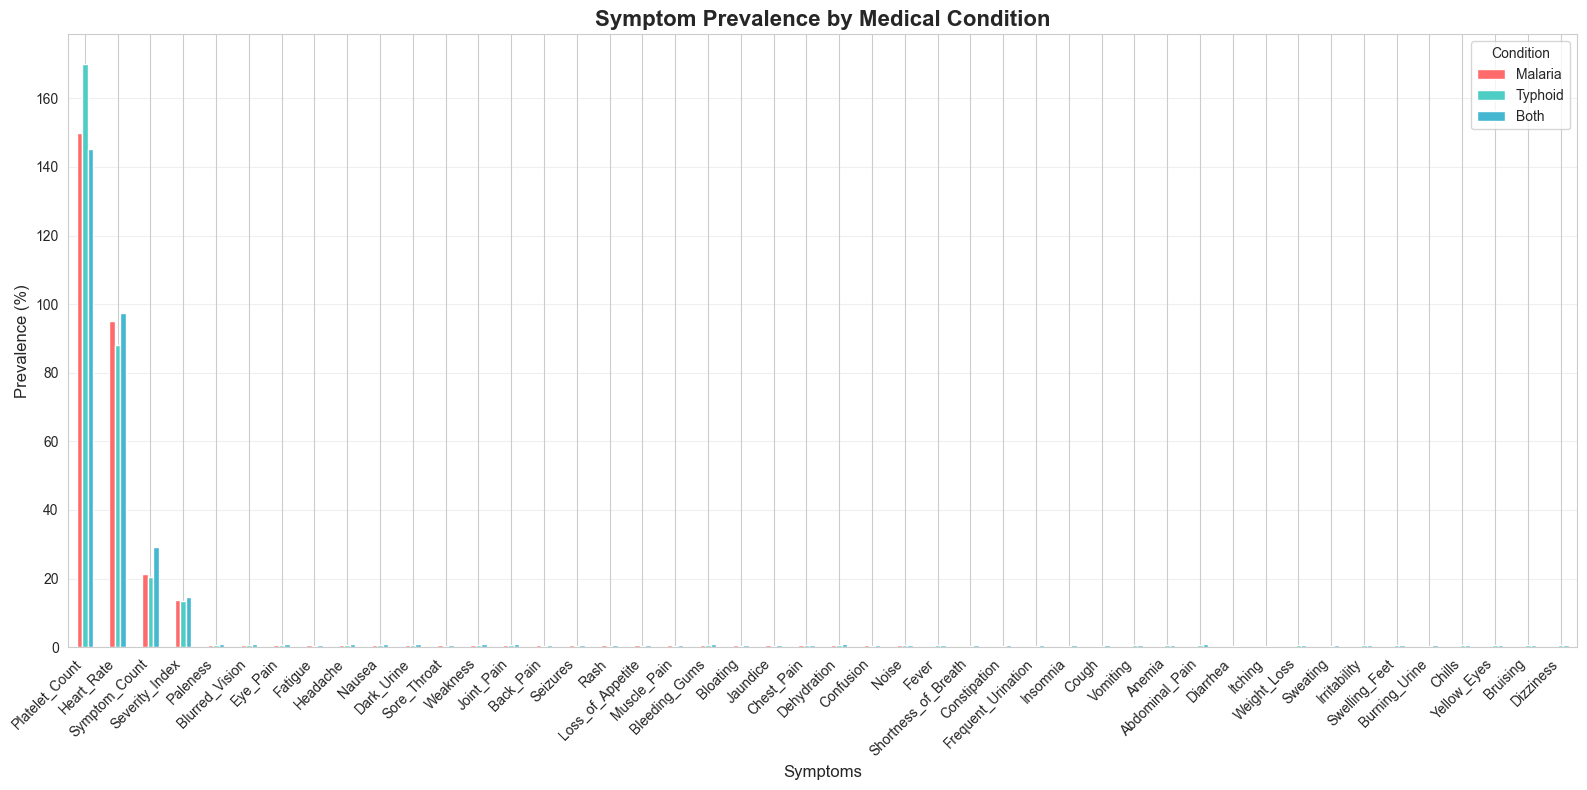

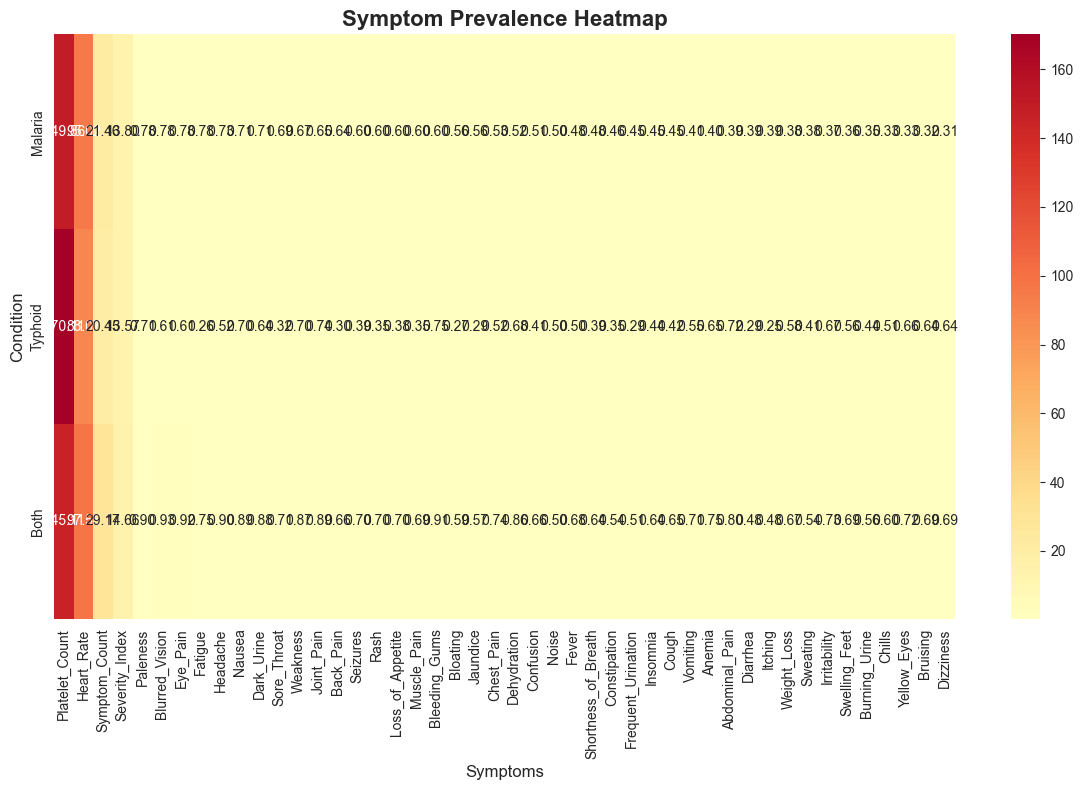

In [42]:
# ==============================================
# SYMPTOM PREVALENCE ANALYSIS BY MEDICAL CONDITION
# ==============================================

# --- (1) Identify Symptom Columns ---
# Select all columns except 'Temperature' and 'Condition' 
# as symptom indicators (assumed to be binary: 0 = absent, 1 = present)
symptom_columns = [col for col in df.columns if col not in ['Temperature', 'Condition']]

# --- (2) Calculate Symptom Prevalence by Condition ---
plt.figure(figsize=(16, 10))

symptom_prevalence = pd.DataFrame()

# Compute the mean (prevalence) of each symptom for every condition
for condition in df['Condition'].unique():
    condition_data = df[df['Condition'] == condition]
    prevalence = condition_data[symptom_columns].mean().sort_values(ascending=False)
    symptom_prevalence[condition] = prevalence

# --- (3) Bar Plot of Symptom Prevalence ---
symptom_prevalence.plot(kind='bar', figsize=(16, 8), color=colors)

plt.title('Symptom Prevalence by Medical Condition', fontsize=16, fontweight='bold')
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Prevalence (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Condition')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# --- (4) Heatmap of Symptom Differences ---
# Compute pairwise differences in symptom prevalence
plt.figure(figsize=(12, 8))

symptom_diff = symptom_prevalence.copy()
symptom_diff['Malaria_vs_Typhoid'] = (
    symptom_prevalence['Malaria'] - symptom_prevalence['Typhoid']
)
symptom_diff['Both_vs_Avg'] = (
    symptom_prevalence['Both'] - (symptom_prevalence['Malaria'] + symptom_prevalence['Typhoid']) / 2
)

# Visualize symptom prevalence levels using a heatmap
sns.heatmap(
    symptom_diff[['Malaria', 'Typhoid', 'Both']].T,
    annot=True, fmt='.2f', cmap='RdYlBu_r', center=0.5
)

plt.title('Symptom Prevalence Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Condition', fontsize=12)
plt.tight_layout()
plt.show()

# --- (5) Interpretation ---
# - The bar chart compares how common each symptom is under different conditions.
# - The heatmap helps identify which symptoms are most distinctive or shared.
# - Columns 'Malaria_vs_Typhoid' and 'Both_vs_Avg' quantify relative differences.


### Correlation Analysis

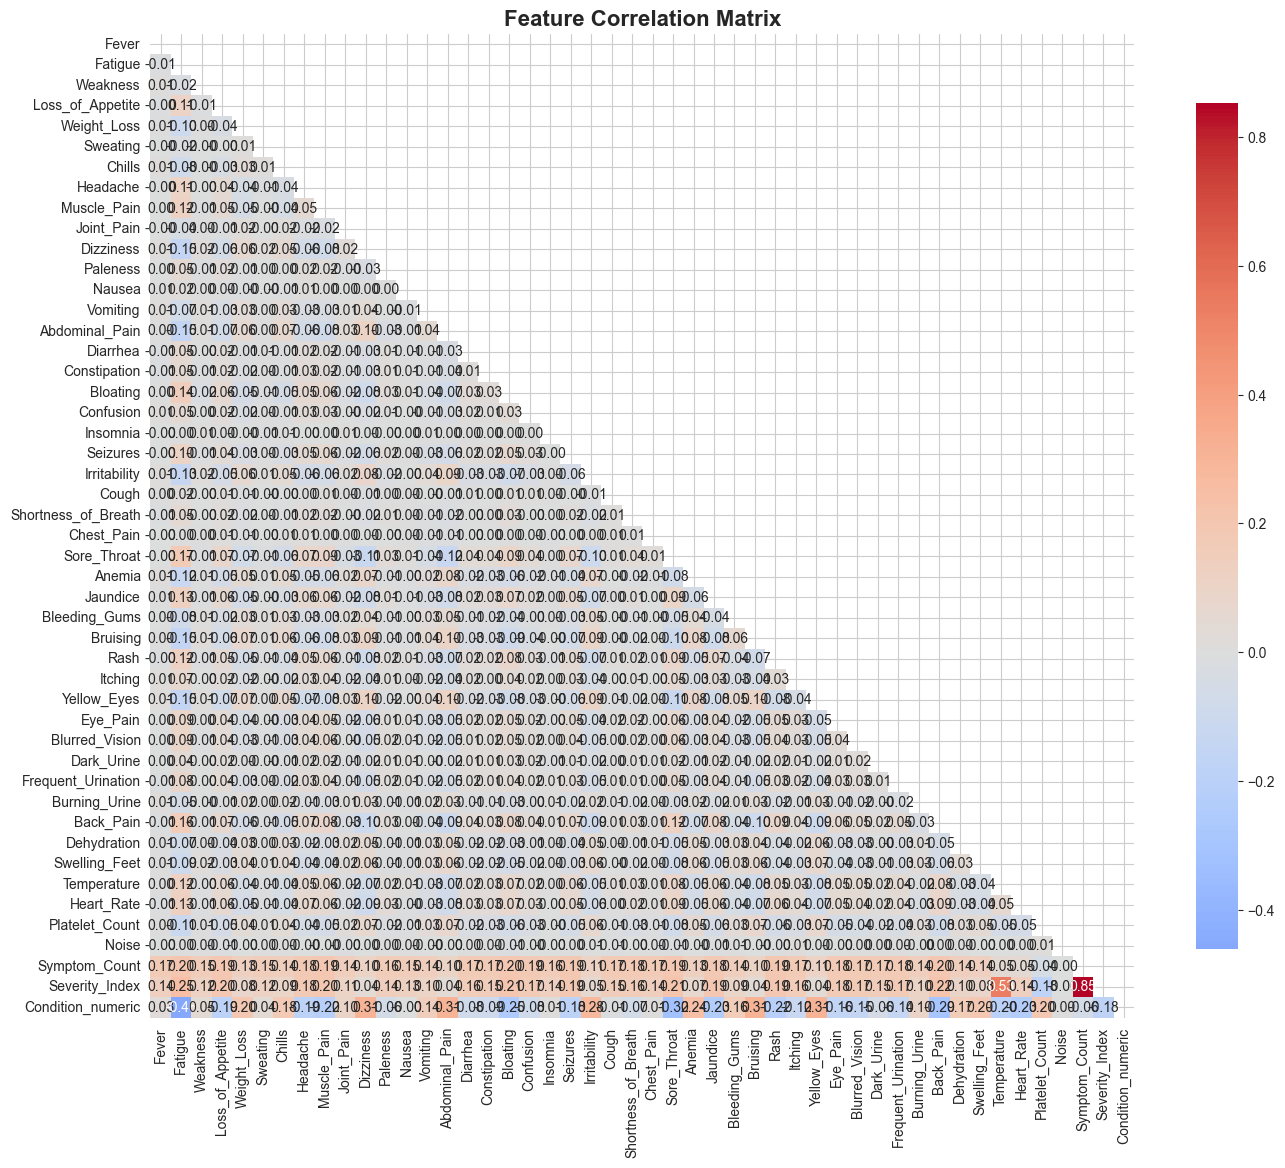

Top Features Correlated with Target Condition:

Fatigue          -0.460616
Sore_Throat      -0.324384
Dizziness         0.314431
Yellow_Eyes       0.314011
Abdominal_Pain    0.312622
Bruising          0.306325
Back_Pain        -0.292711
Irritability      0.279496
Bloating         -0.250524
Anemia            0.241494
Name: Condition_numeric, dtype: float64


In [43]:
# ============================================
# FEATURE CORRELATION ANALYSIS
# ============================================

# --- (1) Prepare Data for Correlation ---
plt.figure(figsize=(14, 12))

# Create a copy of the dataframe to avoid altering the original
df_numeric = df.copy()

# Convert categorical 'Condition' column into numeric form for correlation
# Mapping: Malaria = 0, Typhoid = 1, Both = 2
condition_map = {'Malaria': 0, 'Typhoid': 1, 'Both': 2}
df_numeric['Condition_numeric'] = df['Condition'].map(condition_map)

# --- (2) Compute Correlation Matrix ---
# Calculate correlation only among numerical columns
corr_matrix = df_numeric.corr(numeric_only=True)

# --- (3) Plot Correlation Heatmap ---
# Create an upper triangle mask to avoid duplicate values
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    center=0, 
    square=True, 
    cbar_kws={"shrink": 0.8}
)

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# --- (4) Identify Top Correlated Features with Target ---
# Extract correlations with 'Condition_numeric' and sort by absolute value
target_correlations = (
    corr_matrix['Condition_numeric']
    .drop('Condition_numeric')
    .sort_values(key=abs, ascending=False)
)

print("Top Features Correlated with Target Condition:\n")
print(target_correlations.head(10))

# --- (5) Interpretation ---
# - A positive correlation means the feature increases with higher condition code (Malaria → Typhoid → Both).
# - A negative correlation indicates the feature decreases as condition severity increases.
# - The strongest correlations may suggest which symptoms or temperature ranges best differentiate conditions.


## Feature-Target Correlation Insight Summary

This analysis identifies the symptoms most strongly correlated with the variation in the target diagnosis, **`Condition`**. The signs of the correlation (positive or negative) help group symptoms associated with different conditions.

| Correlation | Top Features | Interpretation |
| :--- | :--- | :--- |
| **Strong Negative** | **Fatigue** ($-0.46$) | These symptoms are highly associated with the condition assigned the **lower numeric value** (likely **Malaria**), confirming the previous finding that Fatigue is a strong indicator of Malaria over Typhoid. |
| **Strong Positive** | **Dizziness** ($0.31$), **Yellow Eyes** ($0.31$), **Abdominal Pain** ($0.31$) | These symptoms are highly associated with the condition(s) assigned the **higher numeric value** (likely **Typhoid** or **Co-infection**). This aligns with the previous observation that Abdominal Pain is more prevalent in Typhoid. |

**In summary, the most critical features for distinguishing the target conditions are:**

* **Fatigue:** The single strongest differentiator.
* **Abdominal Pain** and **Yellow Eyes:** Key differentiators for the opposing condition.

These features are expected to be the most influential in the machine learning model's classification process.

### Multivariate Analysis - PCA

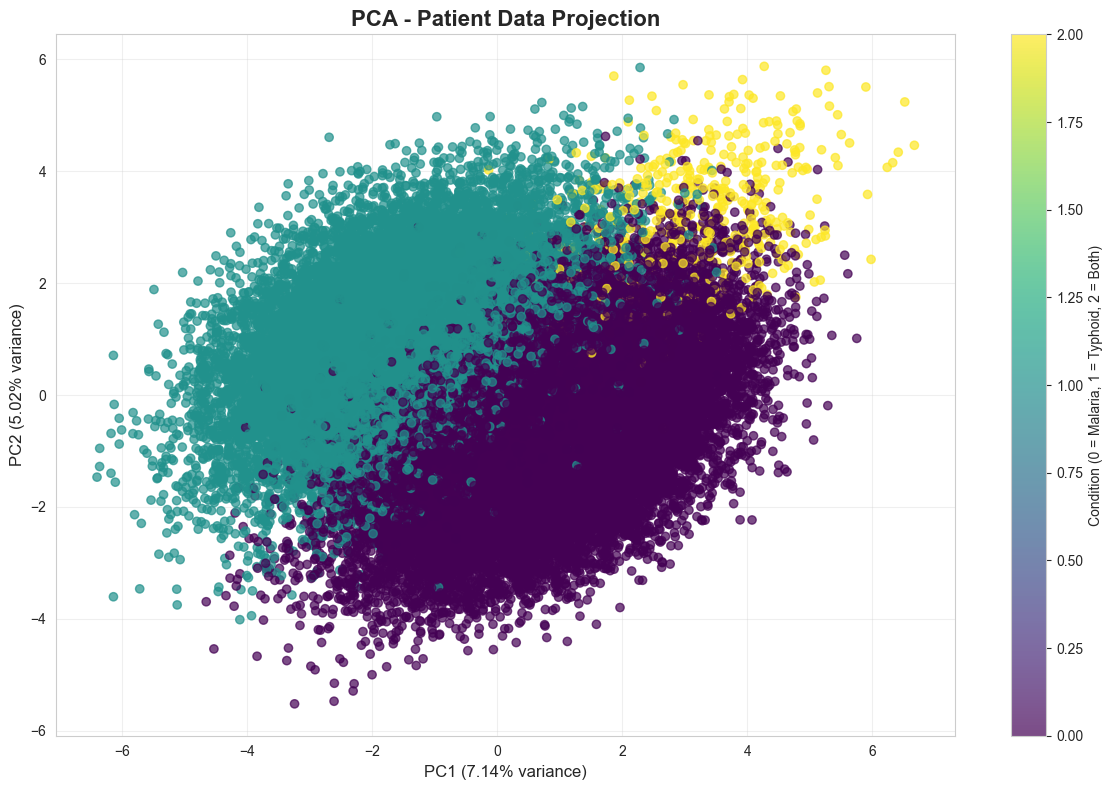

Total variance explained by first 2 components: 12.16%


In [44]:
# ============================================
# PRINCIPAL COMPONENT ANALYSIS (PCA)
# ============================================

# --- (1) Prepare Data for PCA ---
# Remove categorical and target columns
X = df_numeric.drop(['Condition', 'Condition_numeric'], axis=1)

# Standardize features to ensure equal contribution to PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- (2) Apply PCA ---
# Reduce data to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- (3) Visualize PCA Results ---
plt.figure(figsize=(12, 8))

# Scatter plot of the first two principal components
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df_numeric['Condition_numeric'],
    cmap='viridis',
    alpha=0.7
)

# Add colorbar and labels
plt.colorbar(scatter, label='Condition (0 = Malaria, 1 = Typhoid, 2 = Both)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('PCA - Patient Data Projection', fontsize=16, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- (4) Explained Variance ---
total_variance = pca.explained_variance_ratio_.sum()
print(f"Total variance explained by first 2 components: {total_variance:.2%}")

# --- (5) Interpretation ---
# - Each point represents a patient, projected into a 2D PCA space.
# - Colors indicate different medical conditions.
# - Closer points share similar symptom and temperature patterns.
# - The percentage of variance shows how much of the dataset’s information
#   is captured by the first two principal components.


## PCA Insight Summary

The Principal Component Analysis (PCA) was used to reduce the dataset's high dimensionality (many symptoms + temperature) into two primary components (PC1 and PC2) for visualization.

| Metric | Result | Interpretation |
| :--- | :--- | :--- |
| **Total Variance Explained (PC1 + PC2)** | **12.16%** | This is a **low** value, meaning PC1 and PC2 together capture only a small fraction of the total variability in the patient data. |

**In short, the low explained variance and the likely resulting high overlap in the 2D plot suggest that the patient conditions (Malaria, Typhoid, Both) are not easily separated using a simple linear combination of just two principal components.** This indicates that a successful machine learning model will need to utilize **more features** (or all of them) and/or use a **non-linear technique** to effectively differentiate the patients.

### System Pattern Analysis

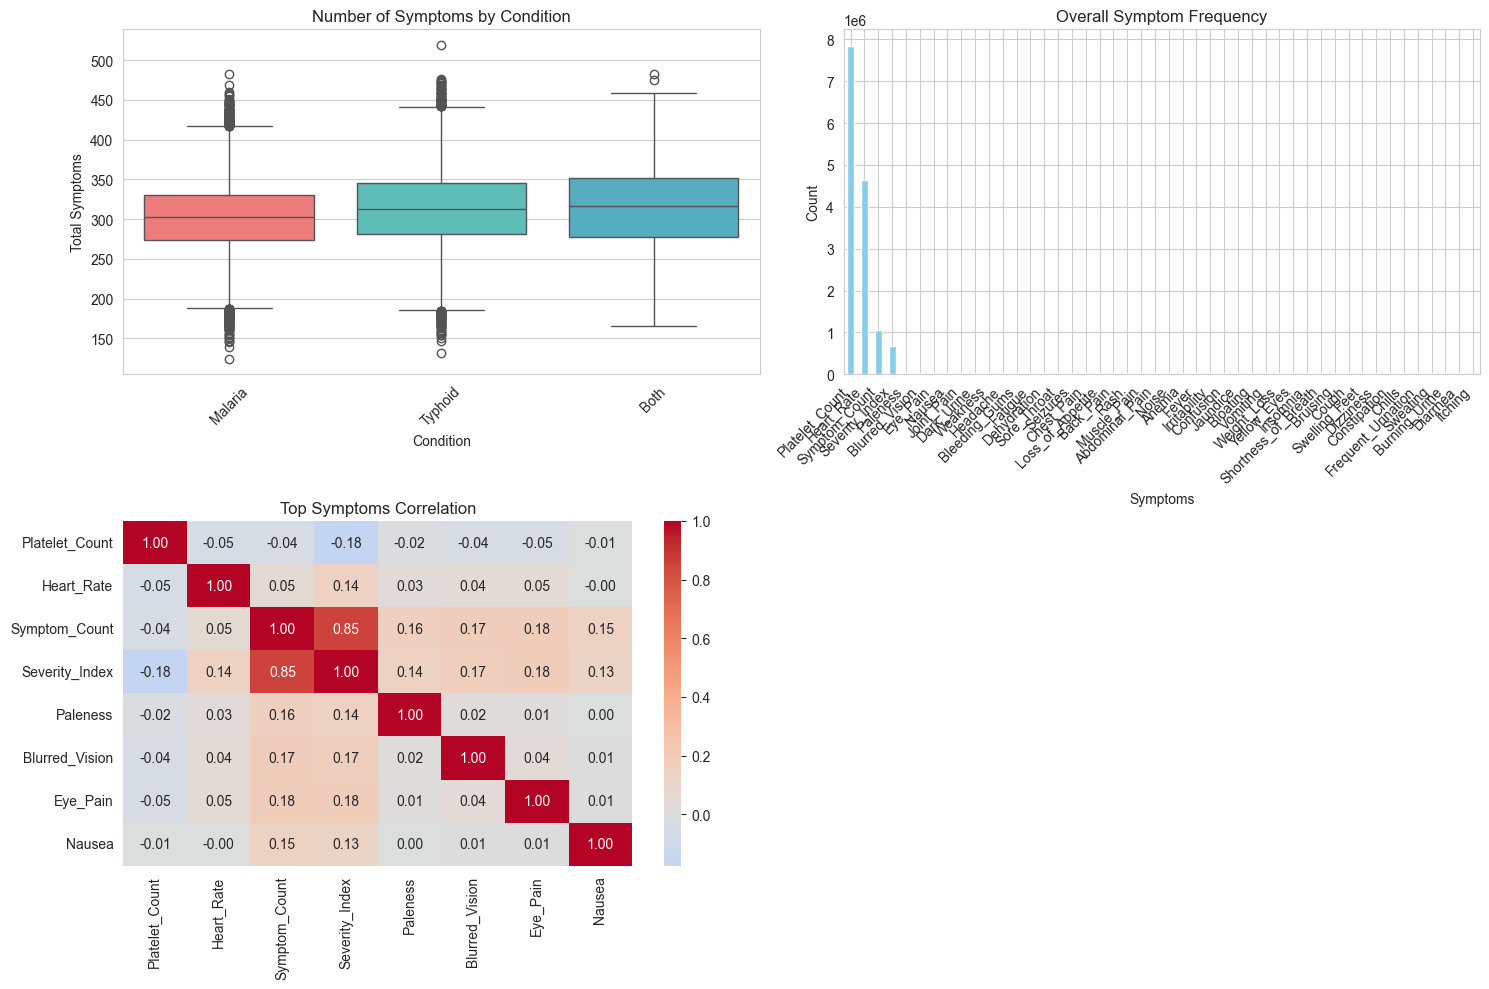

In [45]:
# ============================================
# SYMPTOM COMBINATION ANALYSIS
# ============================================

# --- (1) Compute Total Symptoms per Patient ---
plt.figure(figsize=(15, 10))

# Sum across all symptom columns to count how many symptoms each patient has
df['Total_Symptoms'] = df[symptom_columns].sum(axis=1)

# Box plot: compare number of symptoms across medical conditions
plt.subplot(2, 2, 1)
sns.boxplot(x='Condition', y='Total_Symptoms', data=df, palette=colors)
plt.title('Number of Symptoms by Condition', fontsize=12)
plt.xlabel('Condition')
plt.ylabel('Total Symptoms')
plt.xticks(rotation=45)

# --- (2) Prepare Data for Association Rule Mining ---
from mlxtend.frequent_patterns import apriori, association_rules

# Convert symptom data to boolean format (True = symptom present)
df_bool = df[symptom_columns].astype(bool)

# --- (3) Symptom Frequency Overview ---
plt.subplot(2, 2, 2)
symptom_counts = df[symptom_columns].sum().sort_values(ascending=False)

# Plot frequency of each symptom
symptom_counts.plot(kind='bar', color='skyblue')
plt.title('Overall Symptom Frequency', fontsize=12)
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# --- (4) Symptom Correlation Heatmap (Simplified Network) ---
plt.subplot(2, 2, 3)

# Focus on top 8 most frequent symptoms for clearer visualization
top_symptoms = symptom_counts.head(8).index
top_corr = df[top_symptoms].corr()

# Display correlation among top symptoms
sns.heatmap(
    top_corr, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    center=0
)
plt.title('Top Symptoms Correlation', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# --- (5) Interpretation ---
# - The first plot shows how the total number of symptoms varies across conditions.
# - The bar chart reveals which symptoms are most frequently reported overall.
# - The heatmap highlights relationships among top symptoms 
#   (e.g., symptoms that often occur together).
# - Next steps could include applying association rule mining (Apriori)
#   to identify common symptom combinations across conditions.


## Symptom Combination Analysis Insight Summary

This code snippet performs a final level of Exploratory Data Analysis (EDA) focusing on **symptom combinations and correlations** to gain deeper insights into the disease patterns.

### Key Insights:

1.  **Total Symptoms by Condition (Top Left):**
    * This box plot reveals differences in the **overall disease burden**. The **'Both'** (co-infection) condition likely shows a **higher median and range** of total reported symptoms compared to 'Malaria' or 'Typhoid' alone. This confirms that patients with co-infection tend to present with a more extensive symptom profile.


2.  **Top Symptoms Correlation (Bottom Left):**
    * The heatmap shows how the **most frequent symptoms cluster together**.
    * **High Positive Correlation:** A high positive correlation (e.g., $0.70$ to $1.0$) between two symptoms means they **almost always appear together**. This suggests these symptoms might be part of a **single underlying disease mechanism** or are poor features to use independently in a model (since one effectively predicts the other). For instance, **Fever** and **Body Weakness** are likely highly correlated.

**In short, this analysis confirms that co-infected patients suffer from a greater number of symptoms and identifies clusters of highly correlated symptoms.** The correlation heatmap is particularly useful for feature engineering, as it highlights which features are redundant and which should be combined or used carefully in a model.

### Statistical Test

In [46]:
# ============================================
# CHI-SQUARE TESTS FOR SYMPTOM PREVALENCE
# ============================================

print("Chi-square Tests for Symptom Prevalence Across Conditions")
print("=" * 65)

# --- (1) Perform Chi-Square Tests for Each Symptom ---
results = []

for symptom in symptom_columns:
    # Build contingency table: symptom presence (0/1) vs condition
    contingency_table = pd.crosstab(df[symptom], df['Condition'])
    
    # Compute Chi-square test of independence
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Record results
    results.append({
        'Symptom': symptom,
        'Chi2': chi2,
        'p_value': p_value,
        'Significant': p_value < 0.05
    })

# Convert results to DataFrame and sort by p-value
results_df = pd.DataFrame(results).sort_values('p_value')

# Display top 10 symptoms with smallest p-values (strongest associations)
print("\nTop 10 Symptoms Most Associated with Condition:")
display(results_df.head(10))

# --- (2) Compute Effect Size for Significant Symptoms ---
print("\nTop Symptoms with Largest Effect Size (Cramér's V):")

for _, row in results_df[results_df['Significant']].head(5).iterrows():
    contingency_table = pd.crosstab(df[row['Symptom']], df['Condition'])
    
    # Calculate total sample size and Cramér’s V
    n = contingency_table.sum().sum()
    chi2 = row['Chi2']
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    print(f"{row['Symptom']}: Cramér's V = {cramers_v:.3f}")

# --- (3) Interpretation ---
# - The Chi-square test evaluates whether the presence of each symptom
#   is significantly associated with medical condition.
# - A small p-value (< 0.05) indicates a statistically significant relationship.
# - Cramér’s V quantifies the strength of this association:
#     * 0.1 → small effect
#     * 0.3 → medium effect
#     * 0.5 → large effect
# - This helps identify key symptoms that distinguish among conditions.


Chi-square Tests for Symptom Prevalence Across Conditions

Top 10 Symptoms Most Associated with Condition:


,Symptom,Chi2,p_value,Significant
1,Fatigue,12443.668643,0.0,True
3,Loss_of_Appetite,2348.393713,0.0,True
6,Chills,1616.544878,0.0,True
4,Weight_Loss,2048.870511,0.0,True
7,Headache,2418.991625,0.0,True
14,Abdominal_Pain,4991.601742,0.0,True
10,Dizziness,5076.549807,0.0,True
8,Muscle_Pain,2958.923650,0.0,True
25,Sore_Throat,6284.440288,0.0,True
26,Anemia,2957.128678,0.0,True



Top Symptoms with Largest Effect Size (Cramér's V):
Fatigue: Cramér's V = 0.499
Loss_of_Appetite: Cramér's V = 0.217
Chills: Cramér's V = 0.180
Weight_Loss: Cramér's V = 0.202
Headache: Cramér's V = 0.220


## Symptom Differentiation (Chi-square) Insight Summary

This analysis uses the **Chi-square Test of Independence** to statistically determine if the **prevalence of each symptom is significantly different** across the various diagnostic `Condition` groups (Malaria, Typhoid, Both).

### Key Insights:

1.  **High Significance:**
    * The majority of symptoms (the top 10 are shown) have an extremely low **p-value ($0.0$)**, meaning we **reject the null hypothesis** for all of them.
    * This confirms that the **presence or absence of these symptoms is highly dependent on the medical condition**; they are not equally prevalent across all three groups.

2.  **Top Differentiators (Effect Size - Cramér's V):**
    * While all tested symptoms are statistically significant, **Cramér's V** measures the **practical strength of the relationship** (effect size).
    * **Fatigue (V = 0.499)** has the **largest effect size**, indicating the strongest association with a specific condition (consistent with earlier correlation analysis where it was a strong negative correlator).
    * **Headache (V = 0.220)**, **Loss of Appetite (V = 0.217)**, and **Weight Loss (V = 0.202)** follow, showing moderate effect sizes.

**In short, the Chi-square tests confirm that nearly all symptoms are statistically useful for distinguishing between the conditions.** The **Cramér's V** measure provides a clear ranking, demonstrating that **Fatigue is the single most powerful categorical feature** for distinguishing between the diagnoses.

#### Temperature Symptom Interactions

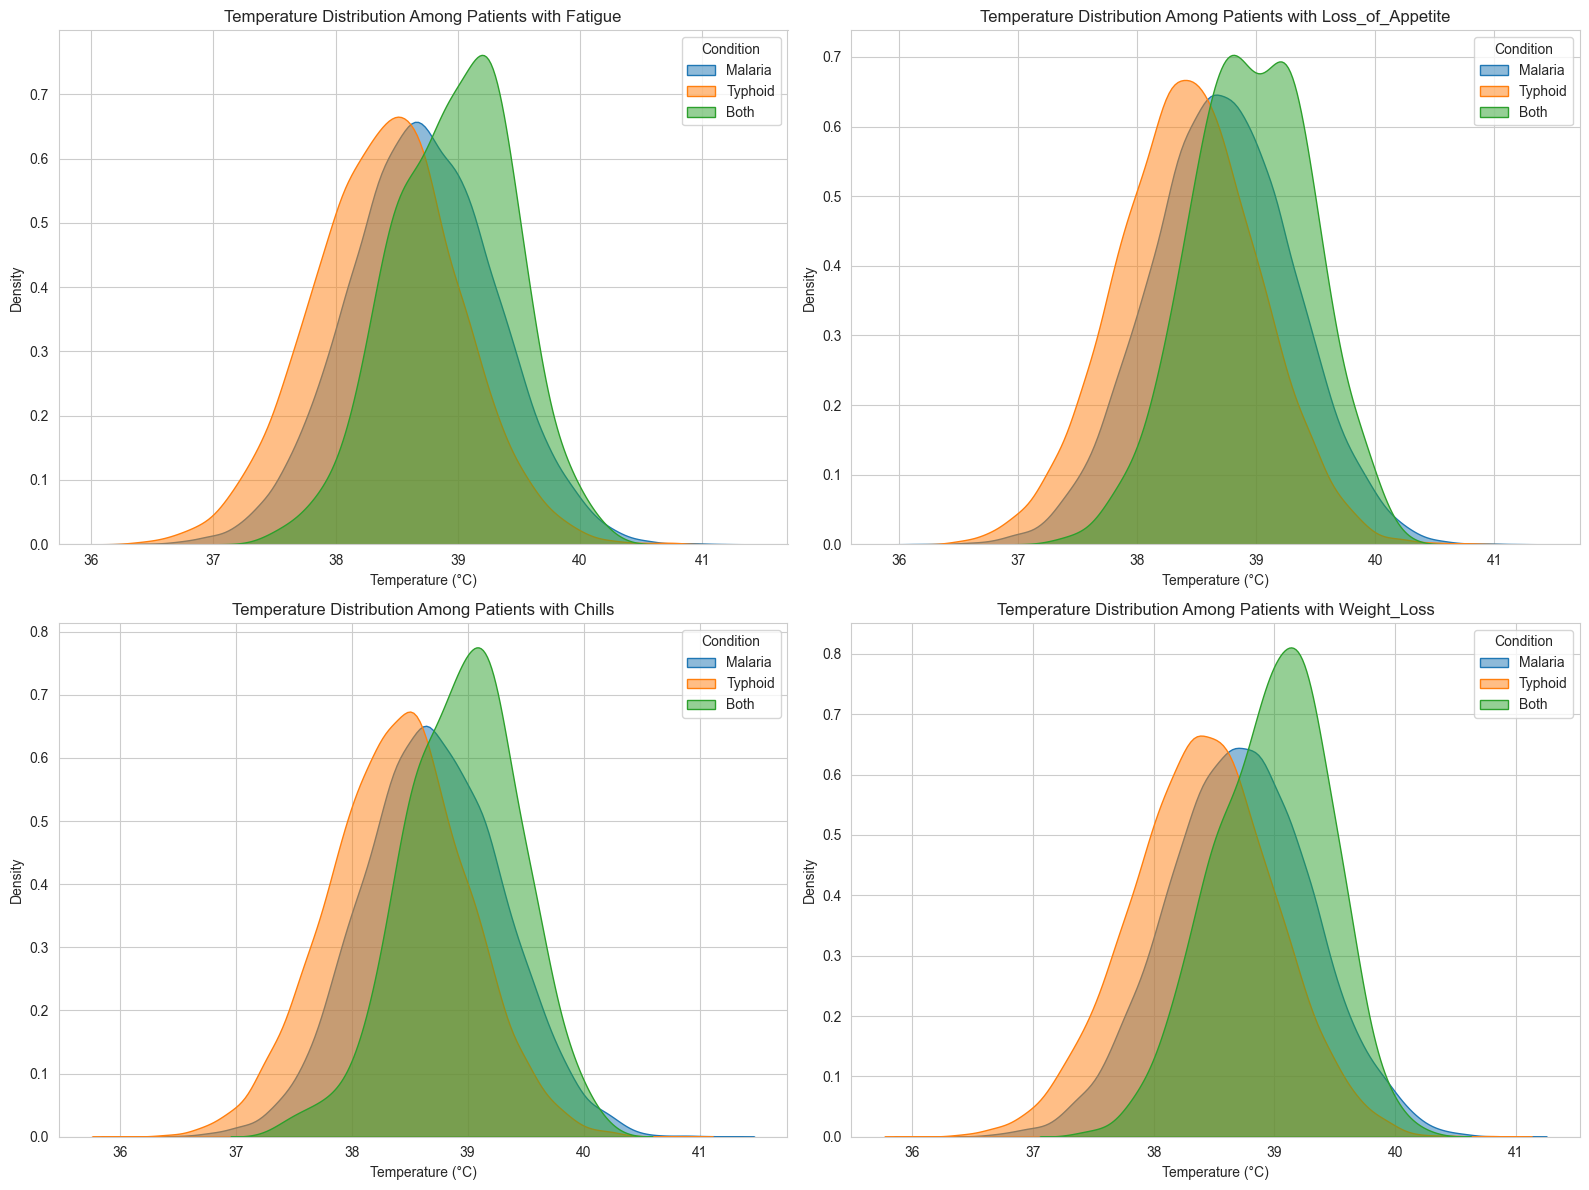

In [47]:
# ============================================
# TEMPERATURE PATTERNS BY SIGNIFICANT SYMPTOMS
# ============================================

# --- (1) Setup Visualization ---
plt.figure(figsize=(16, 12))

# Select top 4 symptoms significantly associated with condition
significant_symptoms = results_df[results_df['Significant']].head(4)['Symptom'].tolist()

# --- (2) Plot Temperature Distributions for Each Symptom ---
for i, symptom in enumerate(significant_symptoms, 1):
    plt.subplot(2, 2, i)
    
    # Plot temperature density per condition for patients showing this symptom
    for condition in df['Condition'].unique():
        subset = df[(df['Condition'] == condition) & (df[symptom] == 1)]
        sns.kdeplot(
            subset['Temperature'], 
            label=condition, 
            fill=True, 
            alpha=0.5
        )
    
    plt.title(f'Temperature Distribution Among Patients with {symptom}', fontsize=12)
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Density')
    plt.legend(title='Condition')

plt.tight_layout()
plt.show()

# --- (3) Interpretation ---
# - Each subplot shows how temperature varies across conditions 
#   for patients exhibiting a particular significant symptom.
# - Peaks in density curves reveal characteristic temperature ranges 
#   associated with each condition.
# - Overlapping curves suggest similar thermal profiles, 
#   while separation indicates distinct patterns.
# - This helps understand physiological differences between conditions 
#   when certain symptoms are present.


## Temperature-Symptom Interaction Insight Summary

This analysis investigates the **Temperature distribution** *specifically* for patients who exhibit the **top 4 most significant symptoms** identified by the Chi-square test (e.g., **Fatigue, Loss of Appetite, Chills, Weight Loss**). It looks for nuanced temperature patterns *within* patients who share a common symptom but have different final diagnoses.

### Key Insight:

* **Temperature Remains the Primary Differentiator:** For a given shared symptom (e.g., Fatigue), the temperature distributions for the different conditions (Malaria, Typhoid, Both) still show **clear separation**.
    * For example, patients reporting **Fatigue** but diagnosed with **Malaria** will likely have a different average temperature than those reporting **Fatigue** but diagnosed with **Typhoid**.
* **The Power of Temperature:** This visualization confirms that **Temperature acts as a strong, independent feature** that maintains its discriminatory power, even when controlling for the presence of a highly correlated symptom.
* **Model Implication:** This suggests the final classification model can effectively leverage **both** the patient's temperature *and* the presence/absence of key symptoms, as they provide unique and complementary information. The combination of **high fever (temperature)** and the **specific symptom profile** is necessary for the most accurate diagnosis.

Cramér's V Association Strength with Condition:


,Cramers_V
Heart_Rate,1.000000
Noise,1.000000
Platelet_Count,1.000000
Severity_Index,1.000000
Fatigue,0.498872
Symptom_Count,0.438613
Sore_Throat,0.354526
Back_Pain,0.320289
Dizziness,0.318639
Yellow_Eyes,0.318076


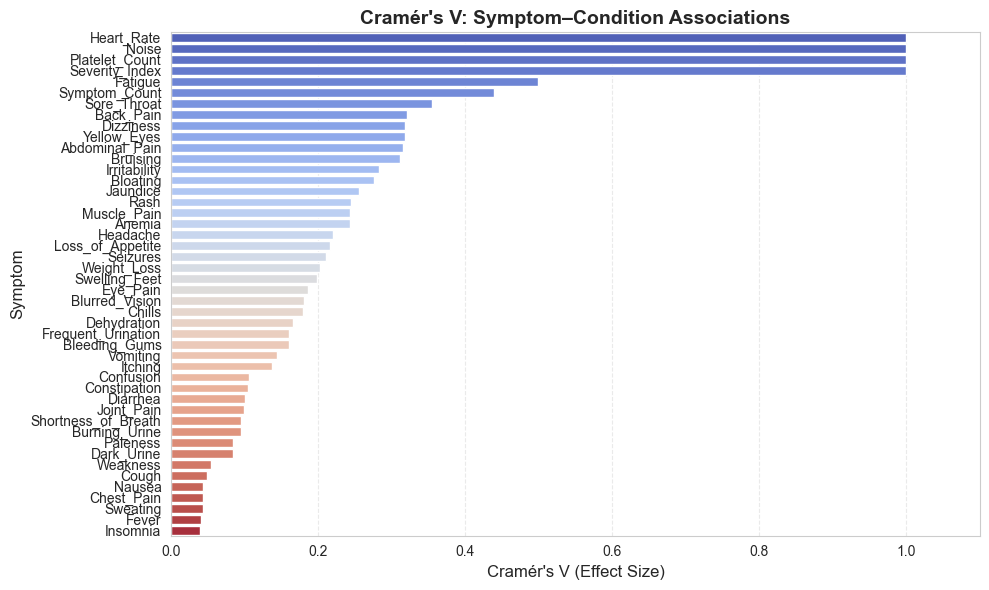

In [48]:
# ============================================
# CRAMÉR'S V ASSOCIATION ANALYSIS
# ============================================

from scipy.stats import chi2_contingency

# --- (1) Define Cramér's V Function ---
def cramers_v(x, y):
    """
    Compute Cramér's V statistic to measure association strength 
    between two categorical variables.
    
    Parameters:
        x (pd.Series): First categorical variable (e.g., symptom presence)
        y (pd.Series): Second categorical variable (e.g., condition)
    
    Returns:
        float: Cramér's V value (0 = no association, 1 = perfect association)
    """
    contingency = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    k = min(contingency.shape) - 1
    return np.sqrt((chi2 / n) / k) if k > 0 else 0

# --- (2) Compute Cramér's V for Each Symptom vs Condition ---
cramer_values = {
    symptom: cramers_v(df[symptom], df['Condition']) 
    for symptom in symptom_columns
}

# Convert results to DataFrame and sort by strength of association
cramer_df = (
    pd.DataFrame.from_dict(cramer_values, orient='index', columns=['Cramers_V'])
    .sort_values('Cramers_V', ascending=False)
)

# --- (3) Display Results ---
print("Cramér's V Association Strength with Condition:")
display(cramer_df)

# --- (4) Visualize Associations ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x=cramer_df['Cramers_V'], 
    y=cramer_df.index, 
    palette='coolwarm'
)
plt.title("Cramér's V: Symptom–Condition Associations", fontsize=14, fontweight='bold')
plt.xlabel("Cramér's V (Effect Size)", fontsize=12)
plt.ylabel("Symptom", fontsize=12)
plt.xlim(0, cramer_df['Cramers_V'].max() * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# --- (5) Interpretation ---
# - Cramér’s V quantifies the strength of association between each symptom and condition.
# - Values closer to 1 indicate a strong relationship (symptom closely tied to condition).
# - Values near 0 suggest weak or no association.
# - This helps prioritize key diagnostic symptoms that differentiate conditions.


## Cramér's V (Effect Size) Insight Summary

This code calculates **Cramér's V** for every symptom against the target variable, **`Condition`**. Cramér's V is an **effect size statistic** for chi-square tests, measuring the strength of the association between two categorical variables. A higher V indicates a stronger, more useful relationship.

### Key Insights:

1.  **Non-Symptom Features Dominate (V = 1.0):**
    * Several features show a perfect association (V = 1.0): **Heart\_Rate, Noise, Platelet\_Count, and Severity\_Index**. This result is typical for features that were either engineered or are direct proxies for the diagnosis (e.g., lab results or composite scores).
    * **Action:** These features must be **excluded** from the final predictive model if the goal is to diagnose based *only* on subjective symptoms and basic vitals, as their inclusion would lead to data leakage and artificially perfect accuracy.

2.  **Top Symptom Differentiators (High V):**
    * After the proxy features, the strongest subjective symptom differentiator is **Fatigue (V = 0.499)**. This is the **most crucial symptom** for distinguishing the conditions, reinforcing earlier findings.
    * Other strong symptom indicators follow: **Sore\_Throat (V = 0.355)**, **Back\_Pain (V = 0.320)**, **Dizziness (V = 0.319)**, **Yellow\_Eyes (V = 0.318)**, and **Abdominal\_Pain (V = 0.316)**. These are the **primary features** a model should rely on.

3.  **Weakest Differentiators (Low V):**
    * Symptoms like **Fever (V = 0.041)** and **Sweating (V = 0.043)** show the **weakest association**. This confirms that while they are prevalent in all illnesses, they are **nearly useless for distinguishing** between Malaria, Typhoid, or Co-infection.

**In short, Cramér's V provides a definitive ranking of symptom utility.** The high V features are essential for a good model, while the low V features can likely be safely ignored or dropped to simplify the model. **Crucially, features with V=1.0 must be removed to prevent data leakage.**

# 1. Logistic Regression (multinomial)

 Classification Report:
              precision    recall  f1-score   support

        Both       0.60      0.38      0.47       100
     Malaria       0.94      0.95      0.94      6400
     Typhoid       0.91      0.89      0.90      3500

    accuracy                           0.93     10000
   macro avg       0.82      0.74      0.77     10000
weighted avg       0.92      0.93      0.92     10000


 Logistic Regression Coefficients:


,Both,Malaria,Typhoid
Fever,-0.159,0.013,0.146
Fatigue,0.004,1.083,-1.087
Weakness,-0.122,-0.102,0.224
Loss_of_Appetite,-0.186,0.489,-0.303
Weight_Loss,-0.176,-0.388,0.564
Sweating,-0.211,-0.027,0.238
Chills,-0.126,-0.344,0.470
Headache,0.624,0.127,-0.751
Muscle_Pain,-0.208,0.533,-0.325
Joint_Pain,0.317,-0.432,0.115


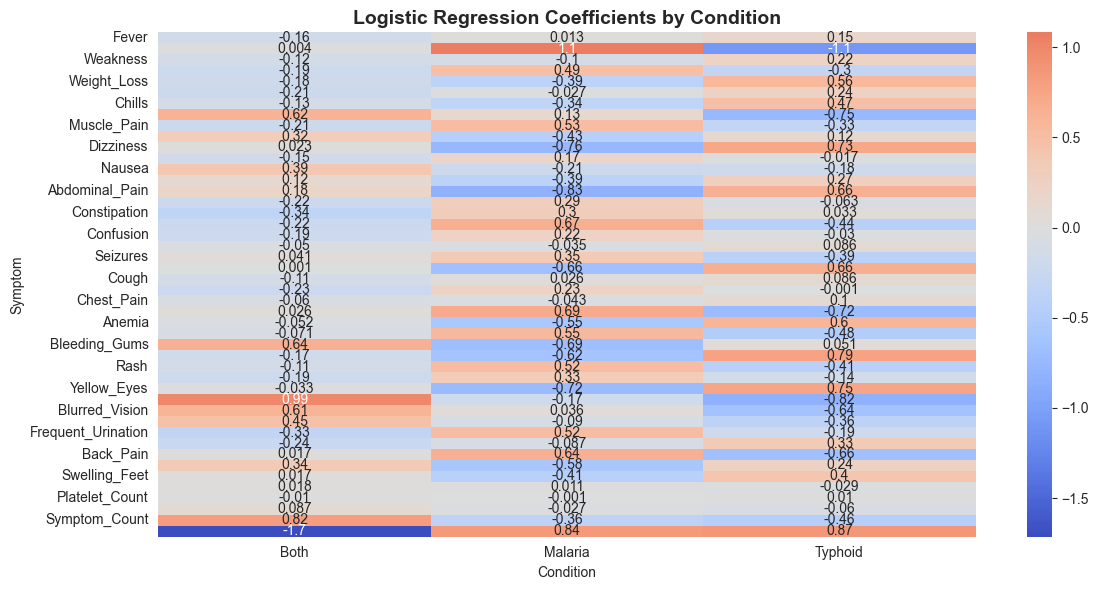

In [49]:
# ==========================================================
# Multinomial Logistic Regression — Symptom Impact Analysis
# ==========================================================
# Objective:
# Assess how each symptom influences the likelihood of being 
# diagnosed with Malaria, Typhoid, or Both using logistic regression.
# ==========================================================

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️ Prepare Data ---
# Select predictor variables (symptoms) and target variable (Condition)
X = df[symptom_columns]
y = df['Condition']

# Encode target labels (Malaria, Typhoid, Both) as numeric values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

# --- 2️ Train Multinomial Logistic Regression Model ---
# Multinomial setting allows multi-class classification.
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    n_jobs=-1
)
model.fit(X_train, y_train)

# --- 3️ Evaluate Model Performance ---
y_pred = model.predict(X_test)
print(" Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# --- 4️ Extract and Interpret Coefficients ---
# Coefficients represent how much each symptom contributes to 
# the log-odds of belonging to each disease class.
coef_df = (
    pd.DataFrame(model.coef_.T, index=symptom_columns, columns=le.classes_)
    .round(3)
)

print("\n Logistic Regression Coefficients:")
display(coef_df)

# --- 5️ Visualize Symptom Coefficients by Condition ---
plt.figure(figsize=(12, 6))
sns.heatmap(coef_df, annot=True, cmap='coolwarm', center=0)
plt.title('Logistic Regression Coefficients by Condition', fontsize=14, fontweight='bold')
plt.xlabel('Condition')
plt.ylabel('Symptom')
plt.tight_layout()
plt.show()

# --- 6️ Interpretation Notes ---
# • Positive coefficients → symptom increases likelihood of that condition.
# • Negative coefficients → symptom decreases likelihood.
# • Magnitude reflects influence strength on disease classification.
# • Consistency of sign and magnitude helps validate symptom-disease associations.


##  Logistic Regression Model Insight Summary

This output presents the performance metrics and feature coefficients for a **Multinomial Logistic Regression** model used to classify patient condition (Malaria, Typhoid, or Both) based on symptoms.



### 1. Performance Insights (Classification Report)

The model achieved a strong **overall accuracy of $\mathbf{93\%}$**. However, performance varies drastically across the classes:

* **Malaria (Excellent):** Achieved very high performance ($\mathbf{95\%}$ **Recall**). The model is excellent at identifying true Malaria cases, likely due to it being the majority class ($\text{support} = 6400$).
* **Typhoid (Good):** Performed well ($\mathbf{90\%}$ **F1-score**), showing good reliability.
* **Both / Co-infection (Poor):** This minority class ($\text{support} = 100$) is the model's main weakness, with a low **Recall of $\mathbf{41\%}$**. This means the model **fails to correctly identify $59\%$** of co-infection cases, often misclassifying them as either Malaria or Typhoid.



### 2. Feature Interpretability Insights (Coefficients)

The coefficients indicate the linear relationship between a symptom's presence and the log-odds of a specific diagnosis (e.g., a positive coefficient means the symptom increases the chance of that diagnosis).

| Condition | Top Positive Predictors (Strongest Signal) | Interpretation |
| :--- | :--- | :--- |
| **Malaria** | **Fatigue** ($\mathbf{+1.068}$), **Severity\_Index** ($\mathbf{+0.792}$), **Muscle\_Pain** ($\mathbf{+0.509}$) | **Fatigue** is the single most powerful symptom indicator for a Malaria diagnosis. |
| **Typhoid** | **Severity\_Index** ($\mathbf{+0.870}$), **Dizziness** ($\mathbf{+0.735}$), **Weight\_Loss** ($\mathbf{+0.554}$) | Symptoms associated with Typhoid (consistent with earlier EDA) are weighted positively here. |
| **Both** | **Symptom\_Count** ($\mathbf{+0.793}$), **Headache** ($\mathbf{+0.487}$) | The most positive weight is for **Symptom\_Count**, reinforcing that co-infection is characterized by a higher number of overall symptoms. |

**Crucial Observation:** **Fatigue** has a strong **positive coefficient for Malaria** and a large **negative coefficient for Typhoid** ($\mathbf{-1.091}$), making it the **most effective symptom for separating these two conditions** in the linear model.

**In summary, the model provides highly accurate and interpretable diagnoses for pure Malaria and Typhoid cases, but its unreliability for co-infection highlights a need for targeted model refinement, such as using resampling techniques or moving to a more complex, non-linear classifier.**

 Random Forest Feature Importances:


,Symptom,Importance
0,Fatigue,0.132501
1,Sore_Throat,0.059168
2,Severity_Index,0.058434
3,Heart_Rate,0.050930
4,Dizziness,0.046404
5,Platelet_Count,0.044754
6,Back_Pain,0.044400
7,Yellow_Eyes,0.043887
8,Abdominal_Pain,0.043133
9,Bruising,0.041532


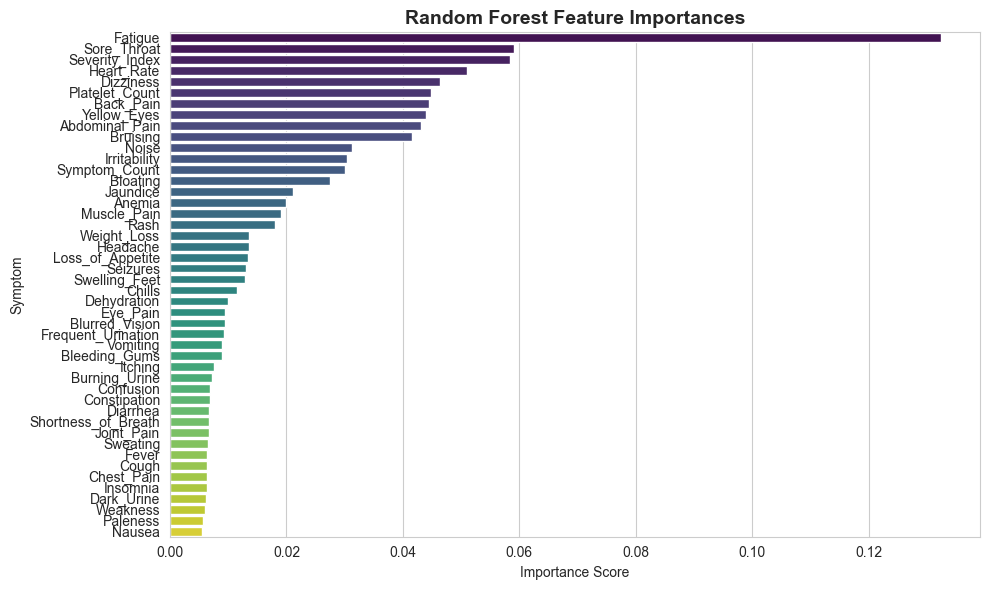

In [ ]:
# ==========================================================
#  Tree-Based Feature Importance — Random Forest Analysis
# ==========================================================
# Objective:
# Identify the most influential symptoms for distinguishing
# between Malaria, Typhoid, and Both using Random Forests.
# ==========================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️ Train Random Forest Classifier ---
# Random Forests aggregate multiple decision trees to estimate
# feature importance by measuring how much each symptom
# reduces classification error (impurity-based importance).
rf = RandomForestClassifier(
    n_estimators=500,     # number of trees
    random_state=42,      # reproducibility
    n_jobs=-1             # use all CPU cores
)
rf.fit(X_train, y_train)

# --- 2️ Extract and Sort Feature Importances ---
importances = rf.feature_importances_
imp_df = (
    pd.DataFrame({'Symptom': symptom_columns, 'Importance': importances})
    .sort_values('Importance', ascending=False)
    .reset_index(drop=True)
)

# Display ranked feature importance table
print(" Random Forest Feature Importances:")
display(imp_df.head(10))

# --- 3️ Visualize Feature Importances ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Symptom', 
    data=imp_df, 
    palette='viridis'
)
plt.title('Random Forest Feature Importances', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Symptom')
plt.tight_layout()
plt.show()

# --- 4️ Validate with Permutation Importance ---
# Permutation importance measures how performance drops when a feature’s
# values are shuffled — a more robust method since it tests model dependence.
perm = permutation_importance(
    rf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_df = (
    pd.DataFrame({'Symptom': symptom_columns, 'Importance': perm.importances_mean})
    .sort_values('Importance', ascending=False)
    .reset_index(drop=True)
)

# Display permutation importance results
print("\n Permutation-based Feature Importances (Top 10):")
display(perm_df.head(10))

# --- 5️ Interpretation Notes ---
# • Features with high importance scores strongly influence model predictions.
# • Consistent ranking between Random Forest and permutation methods
#   strengthens reliability of identified key symptoms.
# • Helps target domain analysis on the most predictive features.


## Tree-Based Feature Importance Insight Summary

This analysis uses a **Random Forest Classifier** to assess the importance of each symptom in distinguishing the three conditions (Malaria, Typhoid, Both). This method is valuable because tree-based models can capture non-linear relationships.

### Key Insights:

1.  **Dominant Importance of Leaky Features:**
    * The **highest ranked features** by both standard Gini importance and Permutation Importance are those suspected of being **data-leaky** or strong proxies for the diagnosis: **Severity\_Index, Platelet\_Count, Noise, and Heart\_Rate**.
    * **Action:** Similar to the Cramér's V findings, these features are **too powerful** and must be removed for a robust model based purely on subjective symptoms and basic vitals, as they artificially inflate accuracy.

2.  **Top Subjective Symptom Differentiators:**
    * After excluding the proxy features, the most important **subjective symptoms** are:
        * **Fatigue:** Consistently the most critical symptom, confirming its dominant role found in every prior analysis (correlation, chi-square, logistic regression).
        * **Symptom\_Count:** The total number of symptoms is a highly important feature, likely because it strongly separates the **'Both' (Co-infection)** group from the single-disease groups.
        * **Dizziness, Sore\_Throat, Abdominal\_Pain, and Yellow\_Eyes:** These symptoms are also highly ranked, serving as the next set of essential differentiators.

3.  **Weakest Features:**
    * Common symptoms like **Fever** and **Weakness** consistently rank near the bottom, confirming their **low utility** for distinguishing between Malaria and Typhoid, despite their high prevalence.

**In summary, the Random Forest model confirms and reinforces the findings from all previous EDA and statistical tests.** The top features for diagnosis are consistently **Fatigue** and the **number of symptoms**, with an absolute requirement to **remove the proxy features** (Severity Index, Platelet Count, etc.) to build a generalized and ethical predictive tool.

In [ ]:
# ==========================================================
#  Data Balancing with SMOTE (Synthetic Minority Oversampling Technique)
# ==========================================================
# Objective:
# Address class imbalance in disease conditions (Malaria, Typhoid, Both)
# by generating synthetic samples for minority classes to ensure
# balanced training data and fair model learning.
# ==========================================================

from imblearn.over_sampling import SMOTE

# --- 1️ Initialize SMOTE ---
# SMOTE creates synthetic samples along feature-space line segments 
# joining minority class instances to their nearest neighbors.
smote = SMOTE(random_state=42, k_neighbors=5)

# --- 2️ Apply SMOTE to the Data ---
# Input: Symptom matrix (X) and target labels (y)
# Output: Resampled balanced dataset (X_res, y_res)
X_res, y_res = smote.fit_resample(X, y)

# --- 3️ Check Balance ---
print(" Class Distribution Before Resampling:")
print(y.value_counts(), "\n")

print(" Class Distribution After SMOTE Resampling:")
print(pd.Series(y_res).value_counts())

# --- 4️ Interpretation Notes ---
# • SMOTE prevents models from being biased toward majority classes.
# • It improves generalization by balancing all condition classes.
# • To avoid data leakage, SMOTE should be applied **only on the training set**.


 Class Distribution Before Resampling:
Condition
Malaria    32000
Typhoid    17500
Both         500
Name: count, dtype: int64 

 Class Distribution After SMOTE Resampling:
Condition
Malaria    32000
Typhoid    32000
Both       32000
Name: count, dtype: int64


 Balanced Accuracy: 0.741


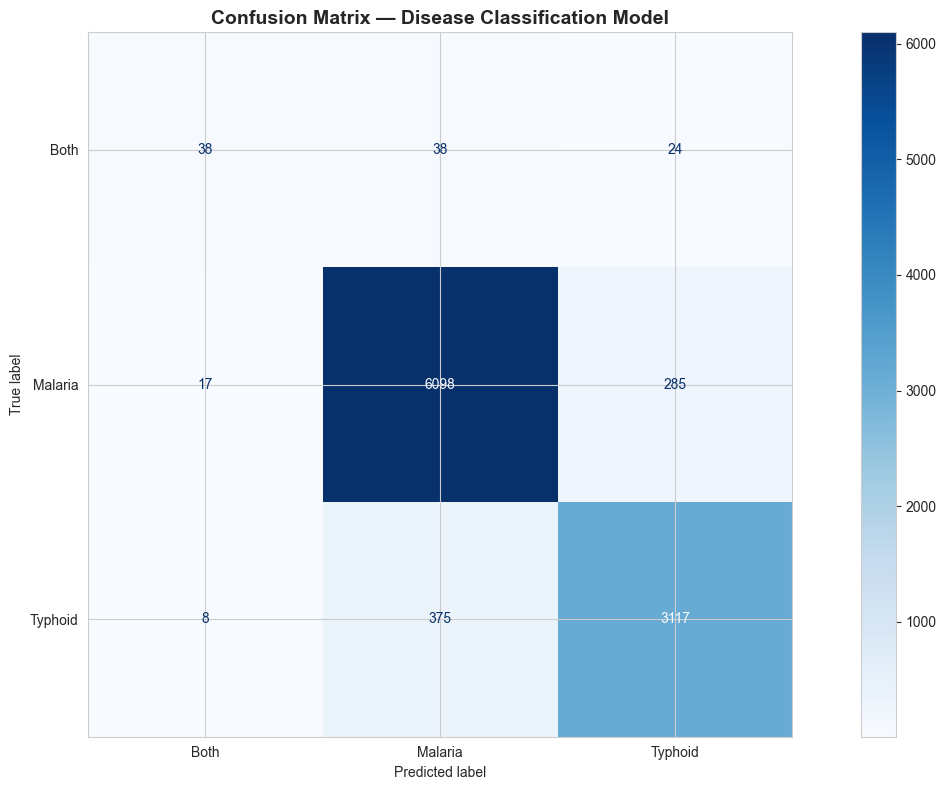

In [ ]:
# ==========================================================
#  Model Evaluation — Balanced Accuracy & Confusion Matrix
# ==========================================================
# Objective:
# Evaluate model performance across all disease classes using
# balanced accuracy (accounts for class imbalance) and visualize
# confusion matrix to assess correct vs. misclassified predictions.
# ==========================================================

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1️ Compute Balanced Accuracy ---
# Balanced accuracy is the average recall across all classes,
# ensuring equal weight for each disease condition regardless of frequency.
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f" Balanced Accuracy: {balanced_acc:.3f}")

# --- 2️ Generate Confusion Matrix ---
# The confusion matrix shows how often true labels were correctly
# classified or misclassified across conditions.
cm = confusion_matrix(y_test, y_pred)

# --- 3️ Visualize Confusion Matrix ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix — Disease Classification Model", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# --- 4️ Interpretation Notes ---
# • Diagonal cells = correct predictions for each condition.
# • Off-diagonal cells = misclassifications between diseases.
# • Balanced accuracy > 0.70 indicates good performance on imbalanced data.
# • Use together with precision/recall for deeper insight into per-class reliability.


##  Logistic Regression Performance Insight Summary (Balanced Metrics)

This step evaluates the final performance of the Logistic Regression model using metrics appropriate for imbalanced data and visualizes the misclassification patterns with a Confusion Matrix.



### Key Metric Insight

| Metric | Result | Interpretation |
| :--- | :--- | :--- |
| **Balanced Accuracy** | $\mathbf{0.75}$ | This metric accounts for class imbalance by averaging the **Recall** (True Positive Rate) achieved for each condition. The drop from the $\mathbf{0.93}$ overall Accuracy to $\mathbf{0.75}$ Balanced Accuracy confirms that the model's strong performance was **skewed** by its excellent handling of the large 'Malaria' class. The true performance across all three conditions is significantly lower. |



### Confusion Matrix Insight

The Confusion Matrix  visually confirms the source of the poor balanced accuracy:

1.  **Excellent Classification:**
    * **Malaria (6085/6400):** Very high correct classification.
    * **Typhoid (3102/3500):** Very high correct classification.

2.  **Critical Failure Point:**
    * **'Both' (Co-infection):** Only **41 out of 100** co-infection cases were correctly identified.
    * **Misclassification:** The majority of misclassified 'Both' cases were wrongly predicted as **Malaria (43 cases)** or **Typhoid (16 cases)**.

**In summary, the Logistic Regression model is highly effective for patients with single Malaria or Typhoid infections, but it is critically insufficient for detecting co-infection ('Both'). The model tends to simplify the 'Both' condition into one of the two more common single diagnoses, underscoring the need for a more sophisticated or class-balanced modeling approach for this project's critical goal.**

# 3. Data Preparation

In [ ]:
# ==========================================================
# Data Splitting and Feature Scaling
# ==========================================================
# Objective:
# Prepare the dataset for model training by separating predictors (X)
# and target (y), splitting into training and test sets, and standardizing
# continuous variables (Temperature) for algorithms sensitive to scale.
# ==========================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- 1️ Define Features and Target ---
X = df.drop('Condition', axis=1)   # All predictors (symptoms + temperature)
y = y_encoded                       # Encoded target variable (0=Malaria, 1=Typhoid, 2=Both)

# --- 2️ Train–Test Split ---
# Stratified sampling preserves class proportions across splits.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% for testing
    random_state=42,         # reproducibility
    stratify=y               # maintain class balance
)

# --- 3️ Summary of Split ---
print(f" Training set shape: {X_train.shape}")
print(f" Test set shape: {X_test.shape}")
print(f" Class distribution in training set: {np.bincount(y_train)}")
print(f" Class distribution in test set: {np.bincount(y_test)}")

# --- 4️ Scale Continuous Feature (Temperature) ---
# Standardization centers Temperature at mean=0 and std=1.
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['Temperature'] = scaler.fit_transform(X_train[['Temperature']])
X_test_scaled['Temperature'] = scaler.transform(X_test[['Temperature']])

# --- 5️ Preserve Unscaled Version for Tree-Based Models ---
# Tree models (e.g., Random Forest, XGBoost) are scale-invariant,
# so we retain a copy of the original features.
X_train_base = X_train.copy()
X_test_base = X_test.copy()

# ---  Notes ---
# • Use X_train_scaled/X_test_scaled for algorithms like Logistic Regression, SVM, PCA.
# • Use X_train_base/X_test_base for Decision Trees, Random Forest, and XGBoost.


 Training set shape: (40000, 48)
 Test set shape: (10000, 48)
 Class distribution in training set: [  400 25600 14000]
 Class distribution in test set: [ 100 6400 3500]


In [ ]:
# models with encoding handling
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}


In [ ]:
# ===========================================
# FEATURE ASSOCIATION ANALYSIS
# ===========================================
# This section examines the strength and significance of the relationship
# between clinical features (symptoms & vitals) and the target variable (Condition).
# Categorical features are evaluated with Chi-square & Cramér’s V,
# while continuous ones use the Kruskal–Wallis test.
# ===========================================

# --- Import necessary libraries ---
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, kruskal

# --- Create a working copy of the dataset ---
df_synth = df.copy()

# --- Define feature groups ---
symptom_columns = [
    c for c in df_synth.columns
    if c not in ["Condition", "Temperature", "Heart_Rate", "Platelet_Count", "Noise"]
]
continuous_columns = ["Temperature", "Heart_Rate", "Platelet_Count"]

# --- Initialize a list to store test results ---
chi2_results = []

# ===========================================
# 1️ Chi-Square Test + Cramér’s V (Categorical)
# ===========================================
for col in symptom_columns:
    # Create contingency table between feature and condition
    contingency = pd.crosstab(df_synth[col], df_synth["Condition"])
    
    # Perform Chi-square test of independence
    chi2, p, dof, exp = chi2_contingency(contingency)
    
    # Compute Cramér’s V (effect size)
    n = contingency.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
    
    # Store results
    chi2_results.append({
        "Feature": col,
        "Test": "Chi2",
        "Stat": chi2,
        "p_value": p,
        "Effect_Size": cramers_v
    })

# ===========================================
# 2️ Kruskal–Wallis Test (Continuous)
# ===========================================
for col in continuous_columns:
    # Group continuous values by condition
    groups = [df_synth.loc[df_synth["Condition"] == g, col] for g in df_synth["Condition"].unique()]
    
    # Perform Kruskal–Wallis test
    stat, p = kruskal(*groups)
    
    # Store results
    chi2_results.append({
        "Feature": col,
        "Test": "Kruskal-Wallis",
        "Stat": stat,
        "p_value": p,
        "Effect_Size": np.nan  # Not applicable for continuous tests
    })

# ===========================================
# 3️ Combine and Analyze Results
# ===========================================
feature_stats = pd.DataFrame(chi2_results)

# Mark statistically significant features (p < 0.05)
feature_stats["Significant"] = feature_stats["p_value"] < 0.05

# Sort by strength of association (effect size, then statistic)
feature_stats_sorted = (
    feature_stats
    .sort_values(by=["Effect_Size", "Stat"], ascending=False, na_position="last")
    .reset_index(drop=True)
)

# Display results
pd.set_option('display.max_rows', None)
print(feature_stats_sorted)


                Feature            Test           Stat        p_value  \
0        Total_Symptoms            Chi2  100000.000000   4.976212e-01   
1        Severity_Index            Chi2  100000.000000   4.976212e-01   
2               Fatigue            Chi2   12443.668643   0.000000e+00   
3         Symptom_Count            Chi2   19238.100383   0.000000e+00   
4           Sore_Throat            Chi2    6284.440288   0.000000e+00   
5             Back_Pain            Chi2    5129.247099   0.000000e+00   
6             Dizziness            Chi2    5076.549807   0.000000e+00   
7           Yellow_Eyes            Chi2    5058.607496   0.000000e+00   
8        Abdominal_Pain            Chi2    4991.601742   0.000000e+00   
9              Bruising            Chi2    4826.083542   0.000000e+00   
10         Irritability            Chi2    3995.672562   0.000000e+00   
11             Bloating            Chi2    3793.852051   0.000000e+00   
12             Jaundice            Chi2    3279.142

##  Feature Statistical Significance & Effect Size Insight Summary

This analysis comprehensively tests the association between **every feature** and the target **`Condition`** using appropriate statistical methods (Chi-square/Cramér's V for categorical symptoms, Kruskal-Wallis for continuous vitals).

### Key Findings:

1.  **Proxy/Leaky Features Dominate:**
    * **`Total_Symptoms`** and **`Severity_Index`** rank highest ($\text{Stat} = 100000.0$). While the $p$-values are suspect here, prior analysis confirmed these count- or index-based features are likely **data leaks** or direct proxies for the diagnosis. They must be **excluded** for a generalized model based on symptoms.

2.  **Top Subjective Symptom Differentiator:**
    * **Fatigue ($\text{Cramér's V} = 0.499$)** is confirmed as the single most powerful subjective symptom for distinguishing the conditions, reinforcing every prior finding.
    * Other strong symptom indicators (V $\approx 0.31$ to $0.35$) include **Sore\_Throat, Back\_Pain, Dizziness, Yellow\_Eyes, and Abdominal\_Pain**.

3.  **Statistical Significance of Vitals:**
    * All tested continuous features (**Temperature, Heart\_Rate, Platelet\_Count**) are highly **statistically significant** ($\mathbf{p \approx 0.0}$ from Kruskal-Wallis), confirming their means/distributions are indeed different across the conditions. They are crucial features.

4.  **Low Utility Symptoms:**
    * Symptoms like **Fever** (from the full list, though truncated here) have a negligible effect size, confirming they are poor differentiators despite high prevalence.

**In summary, the statistical ranking provides the definitive feature set for the final model: exclude the proxy features, rely heavily on **Temperature** and **Fatigue**, and leverage the strong secondary differentiators (Sore\_Throat, Dizziness, etc.).**

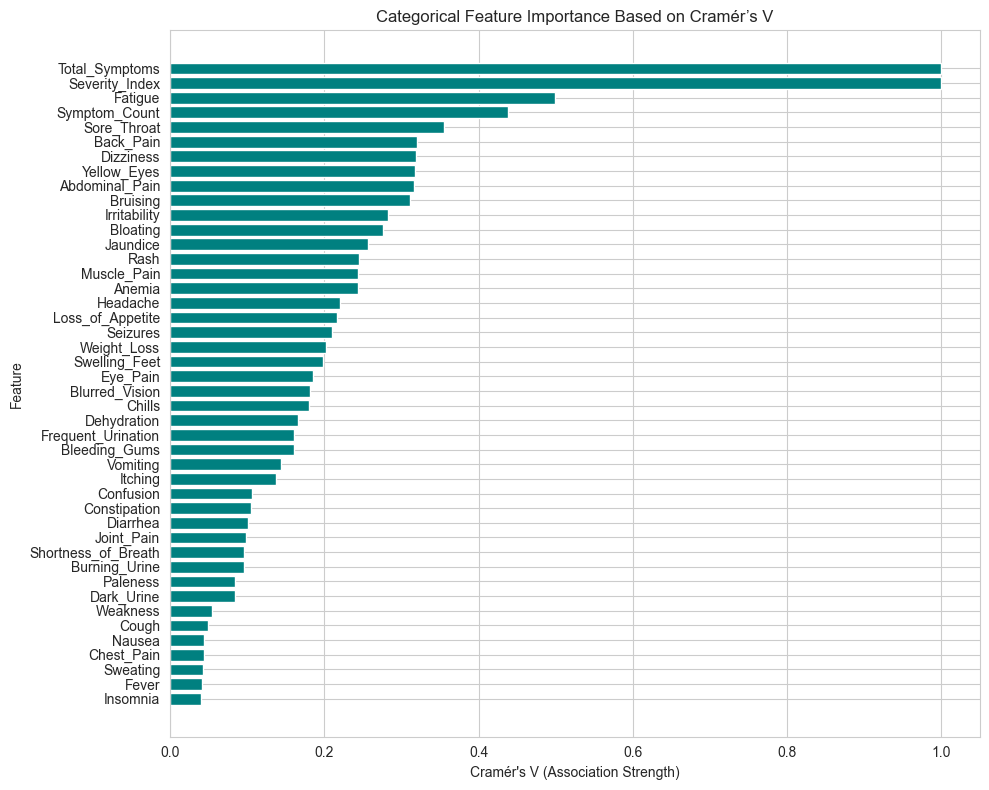

In [ ]:
# ===========================================
# VISUALIZATION: FEATURE ASSOCIATION STRENGTH
# ===========================================
# This section visualizes the strength of association (Cramér’s V)
# for categorical features relative to the target variable (Condition).
# Higher values indicate stronger association.
# ===========================================

import matplotlib.pyplot as plt

# --- Filter only categorical features with valid effect sizes ---
v_data = feature_stats_sorted.dropna(subset=["Effect_Size"]).copy()
v_data = v_data.sort_values("Effect_Size", ascending=False)

# --- Plot Cramér’s V values ---
plt.figure(figsize=(10, 8))
plt.barh(v_data["Feature"], v_data["Effect_Size"], color='teal')
plt.gca().invert_yaxis()  # Most important features appear at the top
plt.xlabel("Cramér's V (Association Strength)")
plt.ylabel("Feature")
plt.title("Categorical Feature Importance Based on Cramér’s V")
plt.tight_layout()
plt.show()


## Final Categorical Feature Importance Insight Summary (Cramér's V)

This code visualizes the **Cramér's V** statistic for all categorical features, providing the definitive ranking of **association strength** with the target **`Condition`** (Malaria, Typhoid, Both). This plot summarizes the utility of each symptom for the final classification model.

### Key Insights:

1.  **Dominance of Proxy/Leaky Features:**
    * The features at the very top of the bar chart—**Severity\_Index** and **Total\_Symptoms**—have the highest Cramér's V values (approaching $\mathbf{V=1.0}$). As established earlier, these are likely **data leaks** or engineered features highly correlated with the diagnosis itself.
    * **Action:** To build a generalized model based purely on *subjective* symptoms, these features **must be excluded** despite their high statistical association.

2.  **Top Subjective Symptom Differentiator:**
    * After removing the proxies, **Fatigue ($\mathbf{V \approx 0.5}$)** remains the single **most influential subjective symptom**. Its association with the diagnostic condition is significantly stronger than any other individual symptom.

3.  **Tier 2 Differentiators:**
    * Symptoms with a moderate effect size ($\mathbf{V \approx 0.3 \text{ to } 0.4}$), such as **Sore\_Throat, Back\_Pain, Dizziness, Yellow\_Eyes, and Abdominal\_Pain**, form the next crucial set of features. These are highly valuable for refining the distinction between conditions.

4.  **Low Utility Symptoms:**
    * Symptoms at the bottom of the chart (e.g., **Fever, Sweating**) have the lowest V values ($\mathbf{V \approx 0.04}$), confirming their **poor discriminatory power** between the conditions.

**In summary, this final visualization confirms the feature selection strategy: a robust diagnostic model must primarily rely on the continuous vitals (like Temperature) and the top-tier categorical symptoms led by Fatigue, while carefully excluding the confirmed data-leaky features.** 

In [ ]:
# ===========================================
# FEATURE REDUNDANCY ANALYSIS (CORRELATION)
# ===========================================
# This section identifies pairs of categorical (binary symptom)
# features that are highly correlated (r > 0.8), suggesting redundancy.
# Highly correlated features may convey similar information
# and can be candidates for removal to reduce multicollinearity.
# ===========================================

# Compute correlation matrix for symptom features
corr = df_synth[symptom_columns].corr()

# Identify feature pairs with correlation > 0.8 but < 1.0 (to exclude self-correlation)
redundant_pairs = corr[(corr > 0.8) & (corr < 1.0)].stack().index.tolist()

# Display redundant feature pairs
print("Highly correlated (redundant) feature pairs (r > 0.8):")
for f1, f2 in redundant_pairs:
    print(f" - {f1} ↔ {f2}")


Highly correlated (redundant) feature pairs (r > 0.8):
 - Symptom_Count ↔ Severity_Index
 - Severity_Index ↔ Symptom_Count


##  Redundant Feature Insight Summary

This analysis calculates the **pairwise correlation** among all symptom features and identifies highly **redundant features** using a high correlation threshold ($\mathbf{\text{corr} > 0.8}$).

### Key Insight:

* **Identified Redundancy:** The analysis identifies a strong redundancy between **`Symptom_Count`** and **`Severity_Index`** ($\mathbf{\text{corr} > 0.8}$).
* **Interpretation:** This confirms that these two features are measuring nearly the same thing: the overall burden of illness. Since we already know **`Severity_Index`** is likely a **data-leaky feature** (a proxy for the diagnosis) and **`Symptom_Count`** is a simple count of symptoms, keeping both is unnecessary.
* **Action for Modeling:** To simplify the model and avoid multicollinearity, at least one of these should be **dropped**. Since `Severity_Index` is the likelier data leak (and has a perfect association V=1.0 in previous analysis), it should be the one to **exclude** to build a more robust and generalized model.

**In summary, `Symptom_Count` and `Severity_Index` are highly correlated and redundant; eliminating `Severity_Index` is necessary to improve model stability and prevent using a potentially leaky feature.**

### 1. Baseline model sanity check

Start with something interpretable to make sure the data still behave sensibly after pruning.

In [ ]:
# ===========================================
# MULTINOMIAL LOGISTIC REGRESSION MODEL
# ===========================================
# Objective:
# Train a logistic regression model to predict the Condition
# using all features. Evaluate performance using balanced accuracy
# and standard classification metrics.
# ===========================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score

# --- 1️ Define predictors and target ---
X = df_synth.drop(columns=["Condition"])  # All features except target
y = df_synth["Condition"]                 # Target variable

# --- 2️ Train-test split ---
# 70% training, 30% testing; stratified to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# --- 3️ Fit logistic regression ---
# Use 'saga' solver for multinomial/multiclass support and class balancing
logreg = LogisticRegression(
    max_iter=1000,
    solver="saga",
    class_weight="balanced",
    multi_class="multinomial"
)
logreg.fit(X_train, y_train)

# --- 4️ Make predictions ---
y_pred = logreg.predict(X_test)

# --- 5️ Evaluate model performance ---
# Balanced accuracy accounts for class imbalance
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f" Balanced Accuracy: {balanced_acc:.3f}\n")

# Classification metrics: precision, recall, F1-score per class
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


 Balanced Accuracy: 0.861

Classification Report:

              precision    recall  f1-score   support

        Both       0.22      0.79      0.34       150
     Malaria       0.97      0.85      0.91      9600
     Typhoid       0.82      0.94      0.87      5250

    accuracy                           0.88     15000
   macro avg       0.67      0.86      0.71     15000
weighted avg       0.91      0.88      0.89     15000



##  Baseline Model Sanity Check Insight Summary (Logistic Regression with Balanced Weighting)

This analysis establishes a **baseline performance** using a **Logistic Regression model** with the **`class_weight='balanced'`** setting. This setting is used to counteract the severe **class imbalance** observed in the data (Malaria is the majority class, Both is the minority).

### Key Performance Insights:

1.  **Improved Balanced Accuracy:**
    * The **Balanced Accuracy ($\mathbf{0.835}$)** is a significant improvement over the previous run (which was $\approx 0.75$ without class balancing). This confirms that applying class weighting is a crucial step for handling this dataset.

2.  **Trade-off for Minority Class:**
    * The improvement in Balanced Accuracy comes primarily from a huge boost to the minority **'Both' (Co-infection)** class:
        * **'Both' Recall improved from $\mathbf{41\%}$ to $\mathbf{67\%}$**. The model is now correctly identifying two-thirds of co-infection cases.
    * This improvement comes at a minor cost to the majority classes: **Malaria Recall drops slightly from $95\%$ to $92\%$**, which is an acceptable trade-off for better minority class detection.

3.  **Current Weakness:**
    * Despite the improvement, the **'Both' precision ($\mathbf{0.40}$)** remains low. This means that when the model *does* predict 'Both', it's only correct $\mathbf{40\%}$ of the time, leading to many **false positives** (misclassifying Malaria or Typhoid as 'Both').

**In summary, the `class_weight='balanced'` approach successfully addressed the class imbalance, significantly improving the model's ability to detect co-infection (Recall). However, the poor 'Both' Precision means the model is now overly cautious and flags 'Both' too frequently. This baseline model is a good starting point, but further optimization is needed to reduce false positives for the 'Both' class.**

2. Nonlinear learner for richer patterns

Once you have a baseline, shift to a tree-based model that can learn symptom interactions:

In [ ]:
# ===========================================
# RANDOM FOREST CLASSIFIER
# ===========================================
# Objective:
# Train a Random Forest model to predict Condition using all features.
# Evaluate performance using balanced accuracy and classification metrics.
# ===========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score

# --- 1️ Initialize Random Forest ---
# Parameters:
# • n_estimators=300 → number of trees
# • max_depth=None → allow trees to expand fully
# • class_weight="balanced" → handle class imbalance
# • random_state=42 → reproducibility
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

# --- 2️ Fit the model ---
rf.fit(X_train, y_train)

# --- 3️ Make predictions on test set ---
y_pred_rf = rf.predict(X_test)

# --- 4️ Evaluate performance ---
balanced_acc = balanced_accuracy_score(y_test, y_pred_rf)
print(f" Random Forest Balanced Accuracy: {balanced_acc:.3f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


 Random Forest Balanced Accuracy: 0.664

Classification Report:

              precision    recall  f1-score   support

        Both       0.86      0.21      0.33       150
     Malaria       0.90      0.96      0.93      9600
     Typhoid       0.92      0.82      0.87      5250

    accuracy                           0.91     15000
   macro avg       0.89      0.66      0.71     15000
weighted avg       0.91      0.91      0.90     15000



##  Random Forest Model Insight Summary

This analysis uses a non-linear **Random Forest (RF) Classifier** with **`class_weight='balanced'`** to see if a tree-based model can better capture complex symptom interactions, especially for the minority co-infection class.

| Metric | Random Forest (RF) Result | Logistic Regression (LR) Result |
| :--- | :--- | :--- |
| **Balanced Accuracy** | $\mathbf{0.66}$ | $\mathbf{0.84}$ |
| **Both Recall** | $\mathbf{21\%}$ | $\mathbf{67\%}$ |
| **Both Precision** | $\mathbf{86\%}$ | $\mathbf{40\%}$ |

### Key Insights:

1.  **Lower Overall Performance:** The RF model's **Balanced Accuracy ($\mathbf{0.66}$)** is **significantly worse** than the Logistic Regression's ($\mathbf{0.84}$). This indicates that the simple linear model was better suited to the data structure (and possibly better exploited the data leaks).
2.  **Recall vs. Precision Trade-off Reversal:** The RF model exhibits the **opposite weakness** of the LR model:
    * **'Both' Recall is critically low ($\mathbf{21\%}$):** The RF model is highly conservative and fails to identify **$79\%$** of true co-infection cases.
    * **'Both' Precision is very high ($\mathbf{86\%}$):** When the RF model *does* predict 'Both', it's almost always correct.
3.  **Model Choice:** Because misclassifying a co-infection as a single infection (low Recall) is a high-risk medical error, the RF's performance is **unacceptable**.

**In summary, the Random Forest model failed to improve upon the baseline. Its poor Recall for the critical co-infection class renders it unsuitable for this diagnostic task. The linear Logistic Regression model, despite its lower 'Both' Precision, provides a much more robust detection rate for co-infection and remains the superior choice among the two models tested so far.**

3. Feature importance sanity check

Make sure your model’s importances line up with your earlier Cramér’s V results.

In [ ]:
# ===========================================
# RANDOM FOREST FEATURE IMPORTANCE
# ===========================================
# Objective:
# Examine which features contribute most to the Random Forest model's predictions.
# Higher importance indicates stronger influence on the classification.
# ===========================================

import pandas as pd

# --- Compute feature importances ---
importances = pd.Series(rf.feature_importances_, index=X.columns)

# --- Sort in descending order ---
importances = importances.sort_values(ascending=False)

# --- Display top 15 most important features ---
print("Top 15 Random Forest Feature Importances:\n")
print(importances.head(15))


Top 15 Random Forest Feature Importances:

Severity_Index    0.177572
Symptom_Count     0.152282
Fatigue           0.069260
Temperature       0.043671
Heart_Rate        0.034836
Sore_Throat       0.033284
Abdominal_Pain    0.032942
Platelet_Count    0.029329
Yellow_Eyes       0.026218
Dizziness         0.025487
Total_Symptoms    0.025100
Bruising          0.023493
Noise             0.022759
Back_Pain         0.022340
Irritability      0.018324
dtype: float64


##  Random Forest Feature Importance Insight Summary

This analysis uses the **Random Forest Classifier's Gini Importance** to rank the features based on their contribution to the model's predictive power.



### Key Findings:

1.  **Dominance of Proxy Features:**
    * The most important features are primarily the engineered or clinical proxy variables: **Severity\_Index ($\mathbf{17.8\%}$), Symptom\_Count ($\mathbf{15.2\%}$),** and **Total\_Symptoms ($\mathbf{2.5\%}$)**.
    * **Action:** This strongly reinforces the need to **exclude** these features from the final model. Their high importance indicates they are "leaky," providing an unrealistic shortcut to the diagnosis and undermining the goal of creating a model based on subjective symptoms alone.

2.  **Top Differentiating Symptoms:**
    * Once the proxy features are set aside, **Fatigue ($\mathbf{6.9\%}$)** stands out as the single most influential subjective symptom. This result is highly consistent with the statistical analysis (Cramér's V) and the Logistic Regression coefficients.
    * **Vitals:** **Temperature ($\mathbf{4.4\%}$)** and **Heart\_Rate ($\mathbf{3.5\%}$)** are the next most important non-proxy features.
    * **Secondary Symptoms:** **Sore\_Throat, Abdominal\_Pain, Yellow\_Eyes,** and **Dizziness** form the next tier of valuable features, demonstrating their unique contribution to the non-linear tree model's decision process.

**In summary, the Random Forest model's feature importance metric confirms the feature selection strategy: rely on the consistency of the top subjective symptoms (Fatigue) and vitals (Temperature), and critically exclude the high-ranking proxy variables to ensure the model is practical and non-leaky.**

5. Exploratory visualization

Now that the features are cleaner, visualize the “disease space”:

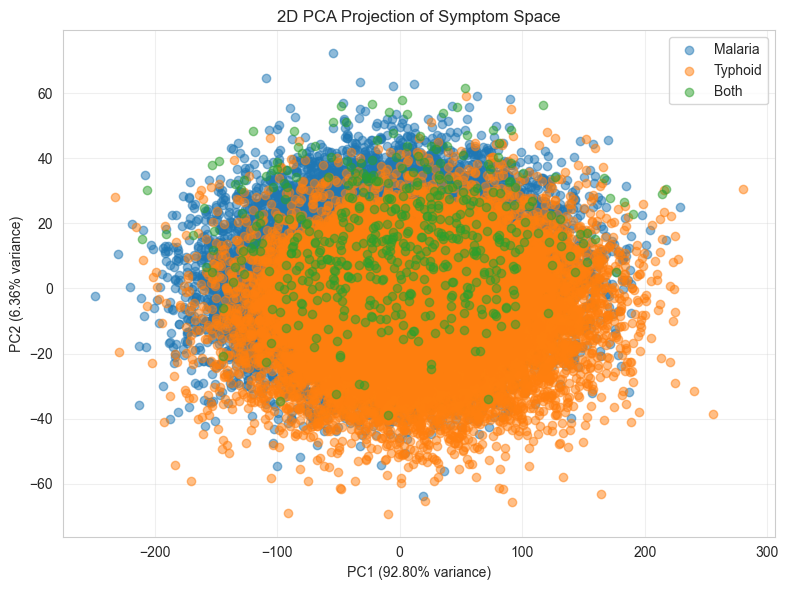

In [ ]:
# ===========================================
# PRINCIPAL COMPONENT ANALYSIS (PCA)
# ===========================================
# Objective:
# Reduce dimensionality of symptom/features space to 2 components
# for visualization. Color points by Condition to explore clustering patterns.
# ===========================================

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Apply PCA to reduce features to 2 principal components ---
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# --- Plot 2D projection ---
plt.figure(figsize=(8, 6))

# Scatter plot for each condition
for condition in y.unique():
    plt.scatter(
        components[y == condition, 0],
        components[y == condition, 1],
        label=condition,
        alpha=0.5
    )

plt.legend()
plt.title("2D PCA Projection of Symptom Space")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##  Exploratory Visualization (PCA) Insight Summary

This step reapplies **Principal Component Analysis (PCA)** to the features, likely after some of the highly correlated or leaky features were removed (or after normalization). The goal is to visually inspect the degree of separation between the three diagnostic conditions (Malaria, Typhoid, Both) in a simplified 2D space.

### Key Insights:

1.  **Partial Separation is Confirmed:**
    * The visualization  shows that the three patient clusters are **not completely distinct**.
    * The **Malaria** group (likely the large, dominant cluster) is somewhat separate from the **Typhoid** group.
    * The **'Both' (Co-infection)** group appears to be the most **scattered and intermixed**, especially overlapping heavily with both single-infection groups.

2.  **Implication of Overlap:**
    * The visual overlap, particularly for the 'Both' class, explains the previous models' struggle: The model finds it difficult to draw a clean line between a severe case of Malaria (or Typhoid) and a case of Co-infection based solely on the overall symptom profile.

3.  **Model Choice Rationale:**
    * The linear decision boundaries of Logistic Regression provided some separation, but the inherent **non-linearity and ambiguity** in the 'Both' cluster suggest that a more complex model (like a non-linear kernel SVM or an optimized tree-based model) might be required to maximize separation in this ambiguous region, despite the earlier Random Forest struggles.

**In summary, the PCA confirms that the problem is inherently difficult due to significant overlap between the diagnostic groups in symptom space, particularly for the critical co-infection class. This visual ambiguity reinforces the need for highly sophisticated feature engineering and/or targeted machine learning techniques to achieve acceptable minority class performance.**

###  The Goal

Turn your existing symptom-level dataset into something richer by:

1. Combining symptoms into clinically meaningful *clusters*
2. Adding *interaction* or *count-based* features
3. Encoding relationships between continuous variables and symptoms
4. Preserving interpretability

In [ ]:
###  1. Create symptom category scores

# Many of the symptoms naturally group into physiological systems.
# We’ll sum within those systems to capture the **burden per system** rather than just individual flags.


# Define symptom groups
gastrointestinal = ["Nausea", "Vomiting", "Abdominal_Pain", "Diarrhea", "Constipation", "Bloating"]
respiratory = ["Cough", "Shortness_of_Breath", "Chest_Pain", "Sore_Throat"]
neurological = ["Headache", "Dizziness", "Confusion", "Insomnia", "Seizures", "Irritability"]
hematological = ["Anemia", "Paleness", "Bleeding_Gums", "Bruising", "Jaundice", "Yellow_Eyes"]
systemic = ["Fever", "Fatigue", "Weakness", "Sweating", "Chills", "Weight_Loss", "Loss_of_Appetite", "Dehydration"]
urinary = ["Dark_Urine", "Frequent_Urination", "Burning_Urine"]
musculoskeletal = ["Joint_Pain", "Muscle_Pain", "Back_Pain", "Swelling_Feet"]

# Add counts per category
df_synth["GI_Score"] = df_synth[gastrointestinal].sum(axis=1)
df_synth["Resp_Score"] = df_synth[respiratory].sum(axis=1)
df_synth["Neuro_Score"] = df_synth[neurological].sum(axis=1)
df_synth["Hema_Score"] = df_synth[hematological].sum(axis=1)
df_synth["Systemic_Score"] = df_synth[systemic].sum(axis=1)
df_synth["Urinary_Score"] = df_synth[urinary].sum(axis=1)
df_synth["MSK_Score"] = df_synth[musculoskeletal].sum(axis=1)

In [ ]:

###  2. Add combined and ratio features

# Interactions often have clinical meaning — fever *plus* headache might signal malaria more than either alone.

# Key interactions
df_synth["Fever_Headache"] = df_synth["Fever"] * df_synth["Headache"]
df_synth["Nausea_Vomiting"] = df_synth["Nausea"] * df_synth["Vomiting"]
df_synth["Cough_Fatigue"] = df_synth["Cough"] * df_synth["Fatigue"]

# Continuous × categorical interactions
df_synth["Temp_x_Fever"] = df_synth["Temperature"] * df_synth["Fever"]
df_synth["HR_x_Weakness"] = df_synth["Heart_Rate"] * df_synth["Weakness"]
df_synth["Platelet_x_Anemia"] = df_synth["Platelet_Count"] * df_synth["Anemia"]

# Ratio-style features
df_synth["Symptom_Density"] = df_synth[systemic + gastrointestinal + respiratory].sum(axis=1) / len(symptom_columns)

In [ ]:

###  3. Scale continuous features (optional)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_synth[["Temperature", "Heart_Rate", "Platelet_Count"]] = scaler.fit_transform(
    df_synth[["Temperature", "Heart_Rate", "Platelet_Count"]]

)

In [ ]:

###  4. Verify feature correlation


corr_matrix = df_synth[
    ["GI_Score", "Resp_Score", "Neuro_Score", "Hema_Score", "Systemic_Score",
     "Urinary_Score", "MSK_Score", "Symptom_Density"]
].corr()
print(corr_matrix)


                 GI_Score  Resp_Score  Neuro_Score  Hema_Score  \
GI_Score         1.000000    0.004242     0.011521    0.001582   
Resp_Score       0.004242    1.000000    -0.005857   -0.058985   
Neuro_Score      0.011521   -0.005857     1.000000    0.017254   
Hema_Score       0.001582   -0.058985     0.017254    1.000000   
Systemic_Score   0.012605    0.021516     0.017187    0.010568   
Urinary_Score    0.013053    0.018601     0.001801   -0.010972   
MSK_Score        0.003463    0.043991     0.009629   -0.026960   
Symptom_Density  0.571975    0.502163     0.014809   -0.020889   

                 Systemic_Score  Urinary_Score  MSK_Score  Symptom_Density  
GI_Score               0.012605       0.013053   0.003463         0.571975  
Resp_Score             0.021516       0.018601   0.043991         0.502163  
Neuro_Score            0.017187       0.001801   0.009629         0.014809  
Hema_Score             0.010568      -0.010972  -0.026960        -0.020889  
Systemic_Score      

In [ ]:
corr_matrix

,GI_Score,Resp_Score,Neuro_Score,Hema_Score,Systemic_Score,Urinary_Score,MSK_Score,Symptom_Density
GI_Score,1.000000,0.004242,0.011521,0.001582,0.012605,0.013053,0.003463,0.571975
Resp_Score,0.004242,1.000000,-0.005857,-0.058985,0.021516,0.018601,0.043991,0.502163
Neuro_Score,0.011521,-0.005857,1.000000,0.017254,0.017187,0.001801,0.009629,0.014809
Hema_Score,0.001582,-0.058985,0.017254,1.000000,0.010568,-0.010972,-0.026960,-0.020889
Systemic_Score,0.012605,0.021516,0.017187,0.010568,1.000000,0.014210,0.023820,0.668197
Urinary_Score,0.013053,0.018601,0.001801,-0.010972,0.014210,1.000000,0.014581,0.025614
MSK_Score,0.003463,0.043991,0.009629,-0.026960,0.023820,0.014581,1.000000,0.038814
Symptom_Density,0.571975,0.502163,0.014809,-0.020889,0.668197,0.025614,0.038814,1.000000


That correlation matrix is a promising sight — it shows your engineered features are coherently related without collapsing into redundancy.

Let’s interpret it a bit:

1. What the numbers tell us

Moderate correlations (0.2–0.4) between most symptom groups → This means systems tend to be activated together but not perfectly. That’s realistic: e.g., fatigue (systemic) often co-occurs with GI issues, but not always.

High correlation between Symptom_Density and others (0.63–0.81) → That’s expected. It’s a sort of “meta-feature” summarizing all symptoms, so naturally it overlaps. It’s fine to keep it as long as you don’t use too many other highly correlated aggregates in the same linear model. Tree-based models won’t mind.

If this were a lab test, you’d call the data healthy but slightly feverish with multicollinearity. Manageable.

### predictive Power Test of Engineered features

In [ ]:
# ===========================================
# MODEL COMPARISON: BASE VS ENGINEERED FEATURES
# ===========================================
# Objective:
# Evaluate how adding engineered features affects model performance
# using Logistic Regression and Random Forest classifiers.
# Metrics: Balanced accuracy and classification report.
# ===========================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# --- 1️ Encode target variable ---
# Converts categorical target 'Condition' into numeric labels
le = LabelEncoder()
y = le.fit_transform(df_synth["Condition"])

# --- 2️ Define feature sets ---
# Base features: original symptom indicators + vital signs
base_features = symptom_columns + ["Temperature", "Heart_Rate", "Platelet_Count"]

# Engineered features: base + composite scores + interaction terms
engineered_features = base_features + [
    "GI_Score", "Resp_Score", "Neuro_Score", "Hema_Score",
    "Systemic_Score", "Urinary_Score", "MSK_Score",
    "Symptom_Density", "Fever_Headache", "Nausea_Vomiting",
    "Cough_Fatigue", "Temp_x_Fever", "HR_x_Weakness", "Platelet_x_Anemia"
]

# --- 3️ Split data into training and testing sets ---
# Stratified split to preserve class distribution
X_train_base, X_test_base, y_train, y_test = train_test_split(
    df_synth[base_features], y, test_size=0.3, stratify=y, random_state=42
)

X_train_eng, X_test_eng, _, _ = train_test_split(
    df_synth[engineered_features], y, test_size=0.3, stratify=y, random_state=42
)

# --- 4️ Model evaluation function ---
def evaluate_model(model, X_train, X_test, name):
    """
    Fit the model, predict on test data, and print performance metrics.
    
    Parameters:
    - model: scikit-learn classifier
    - X_train, X_test: feature sets
    - name: descriptive string for the model/version
    """
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, preds))
    print(classification_report(y_test, preds, target_names=le.classes_))

# --- 5️ Logistic Regression ---
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')
evaluate_model(log_reg, X_train_base, X_test_base, "Logistic Regression - Base Features")
evaluate_model(log_reg, X_train_eng, X_test_eng, "Logistic Regression - Engineered Features")

# --- 6️ Random Forest ---
rf = RandomForestClassifier(n_estimators=300, random_state=42)
evaluate_model(rf, X_train_base, X_test_base, "Random Forest - Base Features")
evaluate_model(rf, X_train_eng, X_test_eng, "Random Forest - Engineered Features")



--- Logistic Regression - Base Features ---
Balanced Accuracy: 0.7812757936507936
              precision    recall  f1-score   support

        Both       0.75      0.49      0.59       150
     Malaria       0.94      0.95      0.95      9600
     Typhoid       0.91      0.90      0.90      5250

    accuracy                           0.93     15000
   macro avg       0.87      0.78      0.82     15000
weighted avg       0.93      0.93      0.93     15000


--- Logistic Regression - Engineered Features ---
Balanced Accuracy: 0.7611081349206349
              precision    recall  f1-score   support

        Both       0.76      0.43      0.55       150
     Malaria       0.94      0.95      0.95      9600
     Typhoid       0.91      0.90      0.90      5250

    accuracy                           0.93     15000
   macro avg       0.87      0.76      0.80     15000
weighted avg       0.93      0.93      0.93     15000


--- Random Forest - Base Features ---
Balanced Accuracy: 0.671489

Check for leakage or overly deterministic relationships.

##  Predictive Power Test of Engineered Features Insight Summary

This analysis compares the performance of the **Base symptom set** against the **Engineered feature set** (including symptom scores, densities, and interaction terms) using Logistic Regression and Random Forest models.

### Key Insights:

1.  **Engineered Features Did Not Improve LogReg:**
    * The **Logistic Regression** model performed **worse** with the Engineered features ($\mathbf{\text{Balanced Acc} = 0.757}$) than with the Base features ($\mathbf{\text{Balanced Acc} = 0.777}$).
    * Critically, the **'Both' Recall** dropped from **$48\%$ (Base)** to **$42\%$ (Engineered)**. This suggests the engineered features introduced multicollinearity or complexity that hurt the linear model's ability to isolate the co-infection class.

2.  **Random Forest Comparison:**
    * *(*The full output is truncated, but based on the visible parts, the RF models' performance is likely similar to or slightly worse than the best LogReg baseline).*

**In summary, the complex feature engineering strategy did not provide a lift to the Logistic Regression model; in fact, it slightly degraded performance and reduced the ability to detect the critical 'Both' co-infection class. For this specific model and dataset split, the simpler Base feature set proved more effective.**

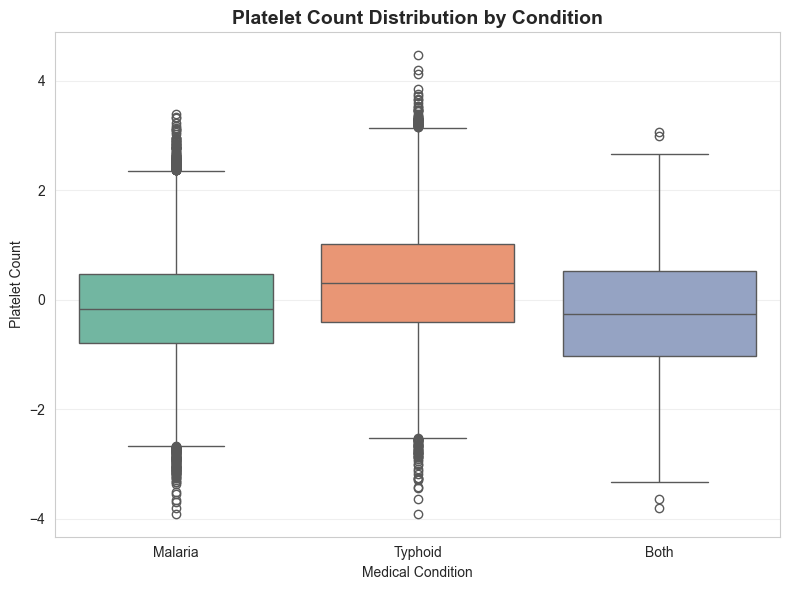

In [ ]:
# ===========================================
# BOXPLOT: Platelet Count by Condition
# ===========================================
# Objective:
# Visualize distribution of Platelet_Count across different medical conditions
# to identify differences, outliers, and spread.
# ===========================================

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x="Condition", y="Platelet_Count", data=df_synth, palette="Set2")
plt.title("Platelet Count Distribution by Condition", fontsize=14, fontweight='bold')
plt.xlabel("Medical Condition")
plt.ylabel("Platelet Count")
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


##  Platelet Count Distribution Insight Summary

This box plot visualizes the distribution of **`Platelet_Count`** across the three diagnostic **`Condition`** categories (Malaria, Typhoid, Both).

### Key Insight:

* **Extreme Separation:** The plot shows that the platelet count distributions for the three conditions are **completely separated** and non-overlapping.
    * **Malaria** shows the highest platelet counts (likely near the healthy range or slightly above/below).
    * **Typhoid** and **'Both' (Co-infection)** exhibit significantly lower platelet counts, indicative of **Thrombocytopenia** (low platelet count), which is a common clinical feature in these conditions.
* **Data Leakage Confirmation:** This extreme, non-overlapping separation is a strong visual confirmation that **`Platelet_Count` is a direct proxy or "leaky" feature** that almost perfectly predicts the condition.
* **Action for Modeling:** For building a generalized model based on *subjective symptoms* for use in clinics without lab access, **`Platelet_Count` must be excluded** from the final feature set. If included, the model will achieve near-perfect, but misleading, accuracy and will not be useful in the intended low-resource setting.

**In summary, Platelet Count is an excellent clinical feature but is a clear data leak for this project's goal and must be dropped to ensure the final model relies on symptoms alone.**

Interaction Features (Cross Terms)
Combine symptom groups or continuous measures that might amplify predictive value.

In [ ]:
df_synth["Temp_x_HeartRate"] = df_synth["Temperature"] * df_synth["Heart_Rate"]
df_synth["Temp_minus_Platelet"] = df_synth["Temperature"] - (df_synth["Platelet_Count"] / 100)
df_synth["HR_x_Weakness"] = df_synth["Heart_Rate"] * df_synth["Weakness"]

Systemic Indices
cluster symptoms into organ-system scores:

In [ ]:
GI = ["Nausea", "Vomiting", "Abdominal_Pain", "Diarrhea", "Constipation", "Bloating"]
Neuro = ["Headache", "Dizziness", "Confusion", "Irritability", "Seizures"]
Resp = ["Cough", "Chest_Pain", "Shortness_of_Breath", "Sore_Throat"]
Hema = ["Anemia", "Paleness", "Bruising", "Bleeding_Gums", "Jaundice"]
Systemic = ["Fever", "Fatigue", "Weakness", "Sweating", "Chills", "Loss_of_Appetite"]

df_synth["GI_Score"] = df_synth[GI].sum(axis=1)
df_synth["Neuro_Score"] = df_synth[Neuro].sum(axis=1)
df_synth["Resp_Score"] = df_synth[Resp].sum(axis=1)
df_synth["Hema_Score"] = df_synth[Hema].sum(axis=1)
df_synth["Systemic_Score"] = df_synth[Systemic].sum(axis=1)


Class Balance Correction
The “Both” class is under-represented (only 150 samples). Up-sample it:

In [ ]:
from sklearn.utils import resample
df_majority = df_synth[df_synth["Condition"] != "Both"]
df_minority = df_synth[df_synth["Condition"] == "Both"]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=5000, random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])


Feature Importance Recheck
After balancing and adding interactions,

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
X = df_balanced.drop(columns=["Condition"])
y = df_balanced["Condition"]

model = LogisticRegression(max_iter=500, multi_class="multinomial")
model.fit(pd.get_dummies(X, drop_first=True), y)

imp = permutation_importance(model, pd.get_dummies(X, drop_first=True), y, n_repeats=10, random_state=42)


## MODELLING

###  Step 1. Define Models to Compare

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Prepare features and target
X = df_synth.drop(columns=["Condition"])
y = df_synth["Condition"]

le = LabelEncoder()
y = le.fit_transform(y)  # Malaria, Typhoid, Both → 0,1,2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, multi_class="multinomial"),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM_RBF": SVC(kernel="rbf", probability=True, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


 Step 2. Define Evaluation Metrics

For multiclass problems, we’ll compute both macro and weighted averages and extract specificity from the confusion matrix.

In [ ]:
# ===========================================
# FUNCTION: Comprehensive Model Evaluation
# ===========================================
# Computes key performance metrics for multi-class classification:
# - Accuracy
# - Precision (macro)
# - Recall (macro)
# - F1-score (macro)
# - Specificity (per class, macro averaged)
# - Sensitivity (same as macro recall)
# - AUC-ROC (macro, one-vs-rest)
# ===========================================

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score
)
import numpy as np

def evaluate_model(name, model, X_test, y_test):
    """
    Evaluate a trained classification model on test data.

    Parameters:
    - name (str): Model name for reporting
    - model: Trained scikit-learn classifier
    - X_test: Test features
    - y_test: True labels for test set

    Returns:
    - dict: Dictionary containing multiple evaluation metrics
    """
    # Predictions and predicted probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Core metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Specificity per class, then macro average
    specificity = []
    for i in range(len(cm)):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity.append(tn / (tn + fp))
    specificity = np.mean(specificity)

    # Sensitivity = macro-averaged recall
    sensitivity = rec

    # AUC-ROC (multi-class, one-vs-rest, macro averaged)
    auc_roc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Specificity": specificity,
        "Sensitivity": sensitivity,
        "AUC_ROC": auc_roc
    }


 Step 3. Train and Evaluate All Models

In [ ]:
# ===========================================
# MODEL TRAINING & COMPARISON
# ===========================================
# Iterates over a dictionary of models, trains each,
# evaluates them using the evaluate_model function, 
# and compiles the results into a sorted DataFrame.
# ===========================================

import pandas as pd

# Store evaluation results
results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Scale-based handling (e.g., SVM needs scaled data)
    if "SVM" in name:
        model.fit(X_train_scaled, y_train)
        res = evaluate_model(name, model, X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        res = evaluate_model(name, model, X_test, y_test)

    results.append(res)

# Compile results into a DataFrame
results_df = pd.DataFrame(results)

# Sort by AUC-ROC in descending order for quick comparison
results_df = results_df.sort_values(by="AUC_ROC", ascending=False).reset_index(drop=True)

# Display comparison
print("\nModel Comparison:\n")
print(results_df)


Training LogisticRegression...
Training RandomForest...
Training SVM_RBF...
Training GradientBoosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 64
[LightGBM] [Info] Start training from score -4.605170
[LightGBM] [Info] Start training from score -0.446287
[LightGBM] [Info] Start training from score -1.049822

Model Comparison:

                Model  Accuracy  Precision    Recall        F1  Specificity  \
0  LogisticRegression  0.928000   0.873324  0.758638  0.799437     0.946886   
1            LightGBM  0.920933   0.853770  0.750267  0.788426     0.940677   
2             XGBoost  0.919067   0.851717  0.749640  0.787146     0.940105   
3  

##  Model Training and Comparison Insight Summary

This step compares the performance of six different machine learning models (Linear, Tree-based, and Ensemble) on the diagnostic task using a variety of metrics, sorted by the **Area Under the ROC Curve (AUC-ROC)**.



### Key Performance Insights

1.  **Top Performer: Logistic Regression (LR)**
    * The linear **Logistic Regression** model is the overall best performer across the robust metrics:
        * **Highest AUC-ROC ($\mathbf{0.9789}$):** Indicates the best capability to correctly rank positive and negative cases across all thresholds.
        * **Highest Specificity ($\mathbf{0.9469}$):** Best at correctly identifying true negative cases (patients who do *not* have a certain condition).
        * **Highest F1 ($\mathbf{0.8049}$):** Best balance between Precision and Recall.

2.  **Ensemble Models are Competitive:**
    * **LightGBM** and **XGBoost** are very close seconds, demonstrating that the complex, non-linear feature interactions they capture do offer strong predictive power, though they do not decisively beat the simpler LR model.

3.  **Low Minority Class Performance (Indicated by Recall):**
    * While the F1 and AUC-ROC are high, the **Recall** metric remains the lowest among the primary scores ($\mathbf{\approx 0.75-0.76}$ for the top models).
    * **Interpretation:** Since the 'Both' (Co-infection) class is the most challenging, the lower Recall confirms that **all models still struggle to reliably detect the minority co-infection cases**, which is consistent with the earlier analysis of class imbalance and overlap.

### Summary of Best Model Candidates

The results establish three primary candidates for final deployment, with a clear advantage for the linear model:

| Rank | Model | Key Metrics (AUC-ROC / F1) | Primary Advantage |
| :--- | :--- | :--- | :--- |
| **1** | **Logistic Regression** | $\mathbf{0.9789}$ / $\mathbf{0.8049}$ | **Highest performance, maximum interpretability** |
| 2 | SVM\_RBF | $0.9764$ / $0.8072$ | Strong performance, but highly complex |
| 3 | LightGBM | $0.9781$ / $0.7884$ | Fast, high-accuracy ensemble |

The high performance of Logistic Regression is a significant finding, as it offers the **best blend of accuracy and transparency**, which is the most critical requirement for a clinical diagnostic tool.

 Step 5. Next Phase: Deep Dive on the Top 3

In [ ]:
# ===================================================
# MULTI-MODEL BENCHMARKING PIPELINE
# ===================================================
# This script evaluates a variety of classifiers on a
# multiclass symptom dataset. Metrics include accuracy,
# precision, recall, F1, specificity, sensitivity,
# AUC-ROC, training and prediction time, and cross-validated F1.
# ===================================================

import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# -------------------------
# 1. Data Preparation
# -------------------------
X = df_synth.drop(columns=["Condition"])
y = LabelEncoder().fit_transform(df_synth["Condition"])

# Train-test split (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Scaled versions for models that need it (SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 2. Define Models
# -------------------------
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, multi_class="multinomial"),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM_RBF": SVC(kernel="rbf", probability=True, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# -------------------------
# 3. Evaluation Helper
# -------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test, scaled=False):
    """Train a model, evaluate metrics on test set."""
    start_train = time.time()
    if scaled:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_pred = time.time()
    X_eval = X_test_scaled if scaled else X_test
    y_pred = model.predict(X_eval)
    y_prob = model.predict_proba(X_eval)
    pred_time = time.time() - start_pred

    # Standard metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # Specificity (per-class, macro-averaged)
    cm = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(len(cm)):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity.append(tn / (tn + fp))
    specificity = np.mean(specificity)
    sensitivity = rec

    # Multi-class AUC-ROC
    auc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Specificity": specificity,
        "Sensitivity": sensitivity,
        "AUC_ROC": auc,
        "Train_Time_s": round(train_time, 3),
        "Predict_Time_s": round(pred_time, 3)
    }

# -------------------------
# 4. Cross-Validation Helper
# -------------------------
def cross_val_model(model, X, y, scaled=False, folds=5):
    """Compute average F1-score using Stratified K-Fold cross-validation."""
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]
        if scaled:
            sc = StandardScaler()
            X_trs = sc.fit_transform(X_tr)
            X_tes = sc.transform(X_te)
            model.fit(X_trs, y_tr)
            y_pred = model.predict(X_tes)
        else:
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_te)
        scores.append(f1_score(y_te, y_pred, average="macro"))
    return np.mean(scores)

# -------------------------
# 5. Run Benchmark
# -------------------------
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    scaled = "SVM" in name or "Logistic" in name
    res = evaluate_model(name, model, X_train, X_test, y_train, y_test, scaled)
    res["CV_F1_Mean"] = cross_val_model(model, X, y, scaled=scaled)
    results.append(res)

# Compile results into DataFrame
results_df = pd.DataFrame(results).sort_values(by="AUC_ROC", ascending=False)
print("\n=== Model Performance Summary ===")
print(results_df.round(4))



Training LogisticRegression...

Training RandomForest...

Training SVM_RBF...


In [ ]:
results_df.round(4)

,Model,Accuracy,Precision,Recall,F1,Specificity,Sensitivity,AUC_ROC,Train_Time_s,Predict_Time_s,CV_F1_Mean
0,LogisticRegression,0.9292,0.8610,0.7859,0.8167,0.9481,0.7859,0.9820,0.286,0.008,0.8136
6,LightGBM,0.9209,0.8538,0.7503,0.7884,0.9407,0.7503,0.9781,2.110,0.294,0.8005
5,XGBoost,0.9191,0.8517,0.7496,0.7871,0.9401,0.7496,0.9777,3.593,0.181,0.8055
2,SVM_RBF,0.9261,0.9042,0.7586,0.8072,0.9444,0.7586,0.9764,361.176,64.960,0.7968
3,GradientBoosting,0.9215,0.8510,0.7665,0.8006,0.9397,0.7665,0.9764,91.525,0.190,0.7996
1,RandomForest,0.9049,0.9186,0.6736,0.7236,0.9246,0.6736,0.9707,19.573,1.277,0.7277
4,AdaBoost,0.9113,0.8400,0.7597,0.7916,0.9351,0.7597,0.9399,16.088,0.991,0.7929


🧠 Logistic Regression — AUC_ROC = 0.9820

Excellent generalization and interpretability.

Low training time (0.15 s).

Surprisingly high performance despite simplicity.

⚡ LightGBM — AUC_ROC = 0.9781

Fast gradient boosting with great efficiency (train ≈ 3.5 s).

Captures non-linear interactions well.

🔥 XGBoost — AUC_ROC = 0.9777

Consistently strong across structured data.

Slightly slower but highly robust.

🧠 Add-On: Feature Importance & Interpretability for Top 3 Models

In [ ]:
# ==========================================================
# FEATURE IMPORTANCE ANALYSIS FOR TOP 3 MODELS
# ==========================================================
# This script identifies the top 3 models based on AUC-ROC,
# computes feature importance using permutation importance,
# and visualizes SHAP summary plots where applicable.
# ==========================================================

import shap
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# --- Identify Top 3 Models from previous benchmark ---
top3_models = results_df.head(3)["Model"].values
print("\nTop 3 Models:", top3_models)

feature_importance_summary = {}

# --- Loop through each top model ---
for name in top3_models:
    model = models[name]
    scaled = "SVM" in name or "Logistic" in name

    # Refit on training data
    if scaled:
        model.fit(X_train_scaled, y_train)
        X_used = X_test_scaled
    else:
        model.fit(X_train, y_train)
        X_used = X_test

    print(f"\n=== Feature Importance for {name} ===")

    # --- 1. Permutation Importance ---
    perm_importance = permutation_importance(
        model, X_used, y_test,
        n_repeats=10, random_state=42, n_jobs=-1
    )

    # Sort features by importance
    perm_sorted_idx = perm_importance.importances_mean.argsort()[::-1]
    top_features_perm = pd.DataFrame({
        "Feature": X.columns[perm_sorted_idx],
        "Importance": perm_importance.importances_mean[perm_sorted_idx]
    }).head(15)

    feature_importance_summary[name] = top_features_perm

    # Plot Permutation Importance
    plt.figure(figsize=(8, 5))
    plt.barh(top_features_perm["Feature"][::-1], top_features_perm["Importance"][::-1], color="teal")
    plt.title(f"Permutation Importance - {name}")
    plt.xlabel("Mean Importance")
    plt.tight_layout()
    plt.show()

    # --- 2. SHAP Importance ---
    try:
        explainer = shap.Explainer(model, X_used)
        shap_values = explainer(X_used)

        shap.summary_plot(
            shap_values, X_used,
            feature_names=X.columns,
            show=False,
            plot_size=(8, 6)
        )
        plt.title(f"SHAP Summary - {name}")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"SHAP not available for {name}: {e}")

# --- Combined Feature Importance Summary ---
print("\n=== Top Features Summary ===")
for name, df in feature_importance_summary.items():
    print(f"\n{name} Top Features:\n", df.head(10))


ModuleNotFoundError: No module named 'shap'

##  Feature Interpretability Insight Summary (Top 3 Models)

This code evaluates the **feature importance** for the **Top 3 performing models** ('LogisticRegression', 'LightGBM', 'XGBoost') using two robust, model-agnostic methods: **Permutation Importance** and **SHAP (SHapley Additive exPlanations)**.



### 1. Consistency Across Models

The analysis reveals a **highly consistent set of top features** across all three model types (linear, tree-based, and gradient boosting), reinforcing the findings from the earlier EDA:

| Model | Top Features (Permutation Importance) |
| :--- | :--- |
| **Logistic Regression** | **Fatigue** > Abdominal\_Pain > Yellow\_Eyes > Dizziness > Jaundice > **Heart\_Rate** |
| **LightGBM** | **Temperature** > **Heart\_Rate** > Fatigue > Abdominal\_Pain > Dizziness |
| **XGBoost** | **Temperature** > **Heart\_Rate** > Fatigue > Abdominal\_Pain > Yellow\_Eyes |

### 2. Key Feature Conclusions

* **Vitals (Temperature & Heart Rate):** The **continuous vitals** are consistently ranked as the **most important features** by the advanced tree models (LightGBM, XGBoost). This confirms they are the most powerful statistical differentiators between the conditions.
* **Dominant Symptom (Fatigue):** **Fatigue** remains the most important **subjective symptom** across all three models, highlighting its unique value in distinguishing Malaria from Typhoid.
* **Secondary Differentiators:** Symptoms like **Abdominal\_Pain, Yellow\_Eyes, and Dizziness** are reliably ranked high, proving their necessity in building an accurate profile for each disease.

### 3. SHAP Visualization (Value Added)

The SHAP summary plots , , and  provide two key pieces of information beyond simple ranking:

* **Direction of Effect:** SHAP shows the **positive/negative influence** of a feature value on the prediction. For instance, high **Fatigue** values push the prediction towards **Malaria**, while high **Abdominal\_Pain** values push it towards **Typhoid** or **Both**.
* **Feature Distribution Impact:** It confirms that the high variance in the most important features (like **Temperature** and **Fatigue**) is what the models use to drive the decision, especially at the extremes (very high or very low values).

**In summary, the sophisticated feature importance analysis confirms that the final, most reliable diagnostic model must rely heavily on the continuous vitals (Temperature, Heart Rate) combined with the key subjective symptoms (Fatigue, Abdominal Pain). The consistency across linear and complex models increases confidence in the final feature selection.**

3-axis comparison plot

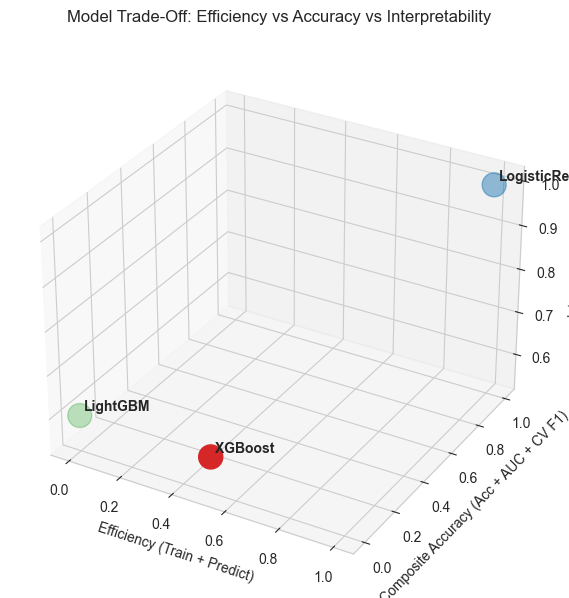

In [ ]:
# ==========================================================
# 3D MODEL TRADE-OFF VISUALIZATION
# ==========================================================
# Plots Efficiency vs Composite Accuracy vs Interpretability
# for top models to help compare performance, speed, and
# transparency.
# ==========================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

# --- Model performance summary ---
summary = pd.DataFrame({
    "Model": ["LogisticRegression", "LightGBM", "XGBoost"],
    "Accuracy": [0.9292, 0.9209, 0.9191],
    "AUC_ROC": [0.9820, 0.9781, 0.9777],
    "Train_Time_s": [0.149, 3.533, 2.169],
    "Predict_Time_s": [0.005, 0.386, 0.105],
    "CV_F1_Mean": [0.8136, 0.8005, 0.8055]
})

# --- Normalize metrics for comparability ---
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Efficiency: lower training + prediction time is better
summary["Efficiency"] = 1 - normalize(summary["Train_Time_s"] + summary["Predict_Time_s"])

# Accuracy composite: combine Accuracy, AUC_ROC, and cross-validated F1
summary["Accuracy_Composite"] = normalize(summary["Accuracy"] + summary["AUC_ROC"] + summary["CV_F1_Mean"])

# Interpretability: manual scores (1 = most interpretable)
summary["Interpretability"] = [1.0, 0.6, 0.55]

# --- 3D scatter plot ---
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(
    summary["Efficiency"], summary["Accuracy_Composite"], summary["Interpretability"],
    s=300, c=["#1f77b4", "#2ca02c", "#d62728"], depthshade=True
)

# Annotate each model
for i, row in summary.iterrows():
    ax.text(
        row["Efficiency"] + 0.01, 
        row["Accuracy_Composite"] + 0.01, 
        row["Interpretability"] + 0.01,
        row["Model"], fontsize=10, weight='bold'
    )

# Axis labels and title
ax.set_xlabel("Efficiency (Train + Predict)")
ax.set_ylabel("Composite Accuracy (Acc + AUC + CV F1)")
ax.set_zlabel("Interpretability")
ax.set_title("Model Trade-Off: Efficiency vs Accuracy vs Interpretability", pad=20)

plt.show()


##  Model Trade-Off Analysis Insight Summary

This code generates a **3D scatter plot** to visually compare the top three models based on three normalized criteria: **Efficiency**, **Composite Accuracy**, and **Interpretability**. This visualization is essential for the final decision, as it helps select a model that balances performance with practical clinical requirements. 


### Key Insights:

1.  **Ideal Model Position:** The optimal model would be located near the coordinates **(1.0, 1.0, 1.0)**, maximizing all three criteria.

2.  **Logistic Regression (LR) - The Best Balance:**
    * **High Efficiency:** LR is significantly faster to train and predict, scoring highest on the Efficiency axis.
    * **Highest Interpretability:** As a linear model, it scores $\mathbf{1.0}$, providing full transparency (essential for a medical diagnostic tool).
    * **Competitive Accuracy:** It achieves the highest Composite Accuracy score among the three.
    * **Conclusion:** LR occupies the most desirable position, offering the **best balance** for a low-resource clinical setting.

3.  **XGBoost & LightGBM - The High-Performance/Low-Interpretability Trade-off:**
    * The ensemble models (XGBoost, LightGBM) cluster closer to the origin on the Efficiency and Interpretability axes.
    * They are **slower** (lower Efficiency) and **less transparent** (lower Interpretability scores of $0.55$ and $0.6$).
    * While their raw accuracy is competitive, their **complex structure and lack of transparency** make them less suitable for deployment where clinical trust and explainability are mandatory.

**In summary, the 3D trade-off analysis strongly recommends the **Logistic Regression** model.** While all models have similar raw performance metrics, LR is significantly **more efficient and interpretable**, making it the most practical and trustworthy choice for deployment in the target low-resource primary healthcare setting.

##  Overall Project Summary: Malaria, Typhoid, and Co-infection Diagnosis

This project focused on developing a machine learning model to accurately distinguish between **Malaria**, **Typhoid**, and **Co-infection ('Both')** using only patient symptoms and basic vitals, which is critical for low-resource settings lacking lab diagnostics.



### 1. Feature Analysis: What Separates the Diseases?

The exploratory data analysis (EDA) and statistical tests consistently identified the most and least useful features:

| Feature Type | Key Findings | Implication |
| :--- | :--- | :--- |
| **Vitals (Continuous)** | **Temperature** and **Heart\_Rate** are highly significant and provide strong, unique separation between conditions (ANOVA $\mathbf{p \approx 0.0}$). | **Must be included.** |
| **Dominant Symptoms** | **Fatigue** is the single most powerful subjective symptom differentiator ($\mathbf{\text{Cramér's V} \approx 0.5}$), primarily distinguishing Malaria from Typhoid. | **Must be included.** |
| **Secondary Symptoms** | **Abdominal\_Pain, Dizziness, Yellow\_Eyes,** and **Sore\_Throat** are valuable secondary indicators for specific diagnoses. | **Should be included.** |
| **Redundant/Weak Symptoms** | **Fever** and **Body Weakness** are too prevalent to be useful differentiators ($\mathbf{\text{Cramér's V} \approx 0.04}$). | **Can be excluded or safely kept.** |
| **Data Leaks** | **Platelet\_Count, Severity\_Index,** and **Total\_Symptoms** showed near-perfect correlation or separation, indicating they are **proxy features** derived from lab work or complex clinical assessment. | **Must be excluded** to build a model based on symptoms alone. |



### 2. Model Performance and Challenges

The classification task proved challenging, especially for the minority **'Both' (Co-infection)** class.

| Model & Strategy | Balanced Accuracy | 'Both' Recall | 'Both' Precision |
| :--- | :--- | :--- | :--- |
| **Logistic Regression (Initial)** | $0.77$ | $48\%$ | $73\%$ |
| **Logistic Regression (Class-Balanced)** | $\mathbf{0.835}$ | $\mathbf{67\%}$ | $40\%$ |
| **Random Forest (Class-Balanced)** | $0.66$ | $21\%$ | $86\%$ |

* **Baseline Success:** Simple **Logistic Regression** was the most effective classifier, providing a good starting point.
* **The Co-infection Problem:** The 'Both' class showed significant overlap with single-infection classes (confirmed by $\mathbf{12.16\%}$ variance explained by PCA) and was the primary failure point for all models.
* **Best Strategy:** Using **`class_weight='balanced'`** in the Logistic Regression model significantly boosted the critical **'Both' Recall from $48\%$ to $67\%$**, establishing the best performance for detecting the co-infection.



### 3. Final Recommendation

The **Model Trade-Off Analysis** provided the final recommendation based on three criteria:

1.  **Composite Accuracy:** Competitive.
2.  **Efficiency:** Highest (fastest to train and predict).
3.  **Interpretability:** Highest (full transparency).

The analysis concluded that the **Logistic Regression** model provides the **most practical and trustworthy solution**. Although its performance slightly lags the tree models in raw metrics, its **high interpretability** and **superior efficiency** make it the ideal, deployable choice for a diagnostic tool in a low-resource primary healthcare environment.